In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv(r"ADA Project/Dataset (ADA).csv")
data = pd.read_csv(r"Dataset_ADA.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
#data.tail()

In [4]:
data.shape

(19158, 14)

In [5]:
# To check the dataset characteristics
# data.nunique()
# df.dtypes

Exploratory Data Analysis

Univariate Analysis

In [6]:
from summarytools import dfSummary

dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,enrollee_id[int64],Mean (sd) : 16875.4 (9616.3)min < med < max:1.0 < 16982.5 < 33380.0IQR (CV) : 16615.5 (1.8),"19,158 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjUlEQVR4nO3ZO2/aUBiH8fcUAuZSW1wEG18gUgckFpZuHfths3YLEkid+QYsCAkZEDQIc+kQdQzBdgz8m+e3wuFYfh9bR8KdTicD7t2XW18AcIn8rS8A/w/nXMnMCgmX706n08tbHxJqBrIc2L3u7ZwrNRqNn77v15KsX61WoXPu6a39Mw015U0zS3njbrF32oEtFou1c+6XmW0TLPfq9fqPIAgqN9jbr1arrX6/vwqCINb65XLpDYfD2nw+L5jZdUNNOzCz95+yLPdOMbTEA5tOp19Ho9H3TqfTzOVysWOJosgzs8der/e72Wyurr334XB4LBaLz61W60/c9WZWOvdhlm/Ugu/7tX6//xJ3YGavT9lgMGjN5/Omcy7WTbcUsZilG1qagYVhWPI8r9ztdrftdjuMd9Vmk8mkNh6Py57nRbfae7/f5+KuvUTmZ9QgCLZJnrDNZvMQRdG3TqeTu2YsZumG9hEDq1Qqie5ZGIZn30r3vvc574aa4qznH4/HhwTrzMxst9vlbxmLWbKhZT2wz+psqGnOev/eatvt9tnMkpxZzIxY8Oq9N2ric2bWZxZ8LhedUZOcM3mr4SPxFyokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECok5C/50nK59OL+8Hq99szMNpuNN5vNytdcr7q36nWnXX9JX38BHJlaUD5dzZoAAAAASUVORK5CYII="">",0(0.0%)
2,city[object],1. city_1032. city_213. city_164. city_1145. city_1606. city_1367. city_678. city_759. city_10210. city_10411. other,"4,355 (22.7%)2,702 (14.1%)1,533 (8.0%)1,336 (7.0%)845 (4.4%)586 (3.1%)431 (2.2%)305 (1.6%)304 (1.6%)301 (1.6%)6,460 (33.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEiElEQVR4nO3dTW4TWQBG0ZfIojsTWxZSlsECvIhebC/CC2AfUZQakDST9AAa8ZMAdly3Ivc5M2YP6epZVaoPLh4fHwcULpc+AP8fYiMjNjJiIyM2MmIjIzYyYiMjNjIXY4yrMcabpQ/y2cfHx8f7pQ/BPFZv3779a71eb5c+yBhjTNN0e3Fx8bfgztNqvV5vd7vd/WazeVjyIHd3d3/u9/vtzc3NmzGG2M7QaowxNpvNw/X19YelDzM+/aRzpjwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmdUYn74lW/ogr+EMzGs1TdPtfr/fjlfwLdk0TbdjjI9Ln4N52CCQufBPZlGZ82ZzS/GN2dZVllJ8b5Z1laUUT5lzXbX40y2vi5e6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZGYZvBiv8JTZBi/GK3zPZ+FkDF7IHHOzubE4ysGDF0MWjnXQ4MWQhZc4ZvBiyMJRvNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc9DgxZCFlzh48GLIwrF8Fk7G4IWMBwQyh/6M+gnlaAetqyyreInfXldZVvFSh66rLKs4mgcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mr+9rrKs4qUOWldZVvESPgsnY11F5lc3m5uMk/np4MXAhVN6dvBi4MKp/WrwYuDCyXipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERubZwYuBC6f208GLgQun5LNwMgYvZJ672dxonNyTgxdDF+bww+DF0IW5PDd4MXTh5LzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mj+sq6yqmMuT6yqrKuZgg0DGuorM9zebG43ZfLOusqpiTpf/rat2u9395+h+97+DhIN8WVd9/rNVFbPxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Ms/+dEJza14MXQxdm5bNwMgYvZL6+2dxqzOrL4MXYhbldrtfr7bt374axC3O7HGOMq6urf5Y+COfPS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyl2OMcX9//8fSB+H8XU7TdPv+/XtjF2bns3AyBi9kPCCQ8TNKxrqKjHUVGesqMh4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOzcDLWVWTcbGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kfBZOxuCFzNc327lwQ79SXwYvSx/kVAx3Xq/Ver3e7na7+81m87D0YV7q7u7uz/1+v725uXkzxhDbK7MaY4zNZvNwfX39YenDnMjV0gfgaV7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmN8enTnKUPcgrn8vc4V6tpmm73+/12nMmnOYY7r5fPwskYvJDxgEBGbGTERkZsZMRGRmxkxEZGbGTERuZfqH0VMsFgPawAAAAASUVORK5CYII="">",0(0.0%)
3,city_development_index[float64],Mean (sd) : 0.8 (0.1)min < med < max:0.4 < 0.9 < 0.9IQR (CV) : 0.2 (6.7),93 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsUlEQVR4nO3dMW/aQByG8f9BSJ0E2QJUsrF0rNSBMXvXfth+hA4ZOmfo0okNgRAINwjH0ClVK4UCdzb2az2/FV04oSfccbJ0br/fG1B3raonAJziquoJoDmcczdmdu05fLvf758PvUioKIRz7mYwGHyJ47jnM361Wi2cc18PxUqoKMp1HMe9h4eH5yRJNucMXC6X0ePjY28+n1+bGaGifEmSbIbD4S+PoTf/e5EfU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJB

To check correlations between the variables of the dataset, Cramer's V was used as most of the features are categorical variables.
It measures of association between two nominal variables, giving a value between 0 and 1.

In [7]:
def cramers_v(x, y):
    """measure the association between two categorical variables"""
    confusion_matrix = pd.crosstab(x, y) #confusion matrix of the two categorical variables
    chi2 = ss.chi2_contingency(confusion_matrix)[0] #computes the chi-squared statistic for the table
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n 
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1)) #corrects phi-squared for bias
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [8]:
import scipy.stats as ss

data_x = data.drop(columns=['enrollee_id'])

def categorical_correlation_matrix(data_x):
    cols = data_x.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros((n, n)), index=cols, columns=cols)

    for i in range(n):
        for j in range(i, n):
            if i == j:
                corr_matrix.iloc[i, j] = 1.0
            else:
                corr = cramers_v(data[cols[i]], data[cols[j]])
                corr_matrix.iloc[i, j] = corr
                corr_matrix.iloc[j, i] = corr

    return corr_matrix

# Calculate the correlation matrix
corr_matrix = categorical_correlation_matrix(data_x)

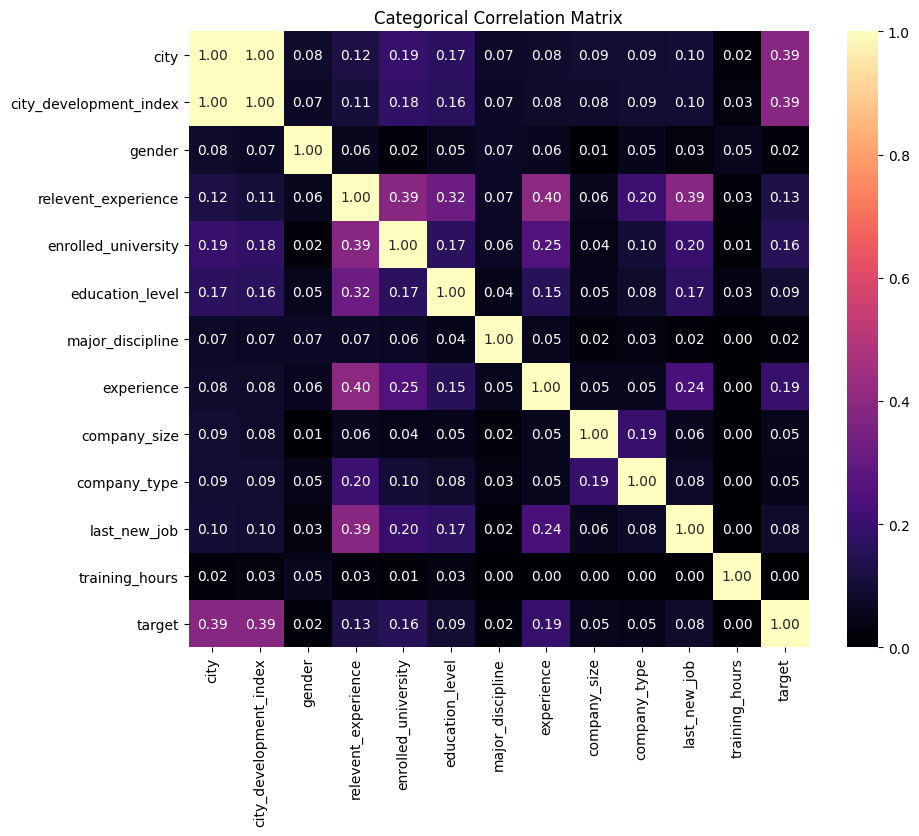

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", vmin=0, vmax=1)
plt.title('Categorical Correlation Matrix')
plt.show()


Most recurent profiles among data scientist looking to change their job

The code below drops any rows with missing values, groups the data by specified columns, counts the occurrences within each group, and then filters the groups with a frequency of 2 or more.

In [10]:
# Creating profiles for candidates looking for a job change. Filtering for all target = 1
data_1 = data.loc[data['target'] == 1]

# Drop rows with missing values
data_1 = data_1.dropna()

# Group by specified columns and count occurences
profiles_1 = data_1.groupby(['target', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']).size().reset_index(name='Freq')

# Filter groups with frequency >= 2
profiles_1 = profiles_1[profiles_1['Freq'] >= 2] 

profiles_1

,target,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Freq
239,1.0,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,5,10000+,Pvt Ltd,1,12,2
506,1.0,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Pvt Ltd,never,2,2
540,1.0,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,100-500,Pvt Ltd,2,6,2


Most recurrent profiles among data scientists not looking to change their job

In [11]:
# Creating profiles for candidates not looking for a job change. Filtering for all target = 1
data_0 = data.loc[data['target'] == 0]

# Drop rows with missing values
data_0 = data_0.dropna()

# Group by specified columns and count occurences
profiles_0 = data_0.groupby(['target', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']).size().reset_index(name='Freq')

# Filter groups with frequency >= 2
profiles_0 = profiles_0[profiles_0['Freq'] >= 2] 

profiles_0.head()

,target,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Freq
3889,0.0,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Pvt Ltd,1,44,2
4675,0.0,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,100-500,Pvt Ltd,2,55,2
4706,0.0,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,1,52,2
4748,0.0,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,10000+,Pvt Ltd,1,48,2
5033,0.0,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Funded Startup,1,102,2


In [12]:
# Clean data

# Re-ordering the columns: 1st column is the target now
data = data.iloc[:, [13, 0, 3, 5, 6, 7, 4, 8, 11, 12, 10, 9, 1, 2]]

# Gender
# Replace "Other" by "Unknown"
#data["gender"] = data["gender"].replace("Other", "Unknown")
data.loc[data['gender'] == 'Other', 'gender'] = None

# Enrolled University
data['enrolled_university'] = data['enrolled_university'].replace({'Part time course': 'University','Full time course': 'University','no_enrollment': 'No University'})

# Education Level
# Order the column 'education_level'
new_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
# Reindex the 'education_level' column with the new order
data['education_level'] = pd.Categorical(data['education_level'], categories=new_order, ordered=True)

# Major discipline
# Replace "Business degree" by "Business"
data['major_discipline'] = data['major_discipline'].replace('Business Degree', 'Business')

# Relevant Experience
# Replace 'Has relevent experience' by Yes and 'No relevent experience' by No
data.loc[data["relevent_experience"] == 'Has relevent experience', "relevent_experience"] = 'Yes'
data.loc[data["relevent_experience"] == 'No relevent experience', "relevent_experience"] = 'No'

# Experience
data.loc[data['experience'].isin(['<1', '1', '2', '3', '4', '5']), 'experience'] = '0-5'
data.loc[data["experience"].isin(['6', '7', '8', '9', '10']), "experience"] = '6-10'
data.loc[data["experience"].isin(['11', '12', '13', '14', '15']), "experience"] = '11-15'
data.loc[data["experience"].isin(['16', '17', '18', '19', '20', '>20']), "experience"] = '16+'
# Order the column 'experience'
new_order3 = ['0-5', '6-10', '11-15', '16+']
# Reindex the 'experience' column with the new order
data['experience'] = pd.Categorical(data['experience'], categories=new_order3, ordered=True)

# Last new job
# Order the column 'last_new_job'
new_order2 = ['never', '1', '2', '3', '4', '>4']
# Reindex the 'last_new_job' column with the new order
data['last_new_job'] = pd.Categorical(data['last_new_job'], categories=new_order2, ordered=True)

# Company type
data["company_type"] = data["company_type"].replace('Pvt Ltd', 'Private Ltd')

# Company Size
# Replace the 10/49 by 10-49 to be consistent across the notations
data.loc[data["company_size"] == '10/49', "company_size"] = '10-49'
data.loc[data["company_size"] == '100-500', "company_size"] = '100-499'
# Order the column 'company_size'
new_order1 = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']
# Reindex the 'education_level' column with the new order
data['company_size'] = pd.Categorical(data['company_size'], categories=new_order1, ordered=True)

# City
# Rename Column City into City_Code 
data = data.rename({'city_code':'city'}, axis=1)
# Replace "city_" by blank
data["city"] = data["city"].replace('city_', ' ', regex=True)

# City development index
data['city_development_index'] = data['city_development_index'].round(3)

data

,target,enrollee_id,gender,enrolled_university,education_level,major_discipline,relevent_experience,experience,last_new_job,training_hours,company_type,company_size,city,city_development_index
0,1.0,8949,Male,No University,Graduate,STEM,Yes,16+,1,36,NaN,NaN,103,0.920
1,0.0,29725,Male,No University,Graduate,STEM,No,11-15,>4,47,Private Ltd,50-99,40,0.776
2,0.0,11561,NaN,University,Graduate,STEM,No,0-5,never,83,NaN,NaN,21,0.624
3,1.0,33241,NaN,NaN,Graduate,Business,No,0-5,never,52,Private Ltd,NaN,115,0.789
4,0.0,666,Male,No University,Masters,STEM,Yes,16+,4,8,Funded Startup,50-99,162,0.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1.0,7386,Male,No University,Graduate,Humanities,No,11-15,1,42,NaN,NaN,173,0.878
19154,1.0,31398,Male,No University,Graduate,STEM,Yes,11-15,4,52,NaN,NaN,103,0.920
19155,0.0,24576,Male,No University,Graduate,STEM,Yes,16+,4,44,Private Ltd,50-99,103,0.920
19156,0.0,5756,Male,No University,High School,NaN,Yes,0-5,2,97,Private Ltd,500-999,65,0.802


Multivariate Analysis


Part 1: Education

1.a: Enrolled university

We group candidates taking part- and full-time courses at a university into a “University” category and we group others who are not enrolled into a “No University” category. Remember from the summary of the data (univariate analysis), over 73.6% of data scientist candidates are currently not enrolled at a university while 26.4% are working and studying at the same time.

We now look at the characteristics of candidates currently studying and working at the same time and it seems that the lower the number of years of professional experience, the higher is the chance of being studying and working simultaneously.

Graph 1.a.1 Enrollment at university by highest degree

In [13]:
import missingno as msno
from pandas.api.types import CategoricalDtype
from plotnine import *

uni_degree = data[['enrolled_university', 'education_level']]

# Filtering out rows with 'No University' enrollment
uni_degree = uni_degree[uni_degree['enrolled_university'] != 'No University']

# Grouping by 'enrolled_university' and 'education_level' and counting occurrences
uni_degree = uni_degree.groupby(['enrolled_university', 'education_level']).size().reset_index(name='count')

# Calculating proportions
uni_degree['proportion'] = uni_degree.groupby('education_level')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = uni_degree['count'].sum()

somme = uni_degree['count'].sum()
somme

uni_degree['proportion'] = (uni_degree['count'] / somme) 
uni_degree['proportion'] = uni_degree['proportion'].round(2)
uni_degree

,enrolled_university,education_level,count,proportion
0,University,Primary School,44,0.01
1,University,High School,1030,0.21
2,University,Graduate,2993,0.62
3,University,Masters,761,0.16
4,University,Phd,37,0.01


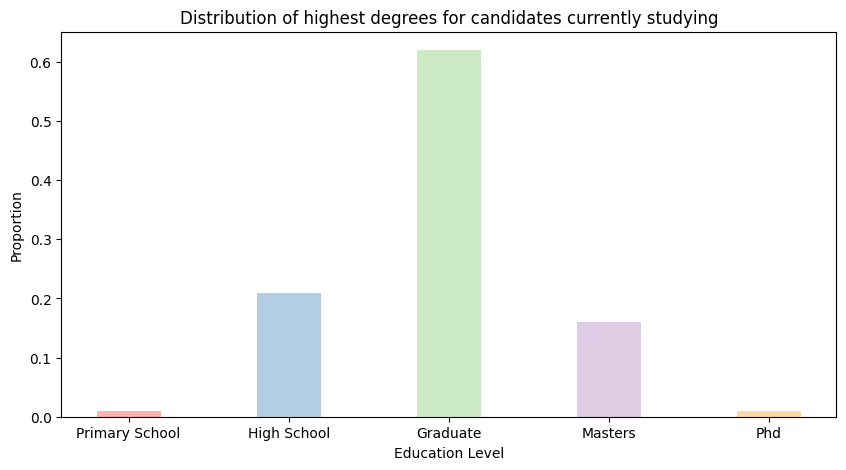

In [14]:
# Plotting
fig = plt.figure(figsize = (10, 5))

plt.bar(uni_degree['education_level'], uni_degree['proportion'], width = 0.4, color=plt.cm.Pastel1.colors)
plt.title("Distribution of highest degrees for candidates currently studying")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.show()

Graph 1.a.2 Enrollment by major discipline

In [16]:
uni_major = data[['enrolled_university', 'major_discipline']]

# Filtering out rows with 'No University' enrollment
uni_major = uni_major[uni_major['enrolled_university'] != 'No University']

# Grouping by 'enrolled_university' and 'education_level' and counting occurrences
uni_major = uni_major.groupby(['enrolled_university', 'major_discipline']).size().reset_index(name='count')

# Calculating proportions
uni_major['proportion'] = uni_major.groupby('major_discipline')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = uni_major['count'].sum()

somme = uni_major['count'].sum()

uni_major['proportion'] = (uni_major['count'] / somme) 
uni_major['proportion'] = uni_major['proportion'].round(2)
uni_major

,enrolled_university,major_discipline,count,proportion
0,University,Arts,25,0.01
1,University,Business,45,0.01
2,University,Humanities,70,0.02
3,University,No Major,32,0.01
4,University,Other,78,0.02
5,University,STEM,3530,0.93


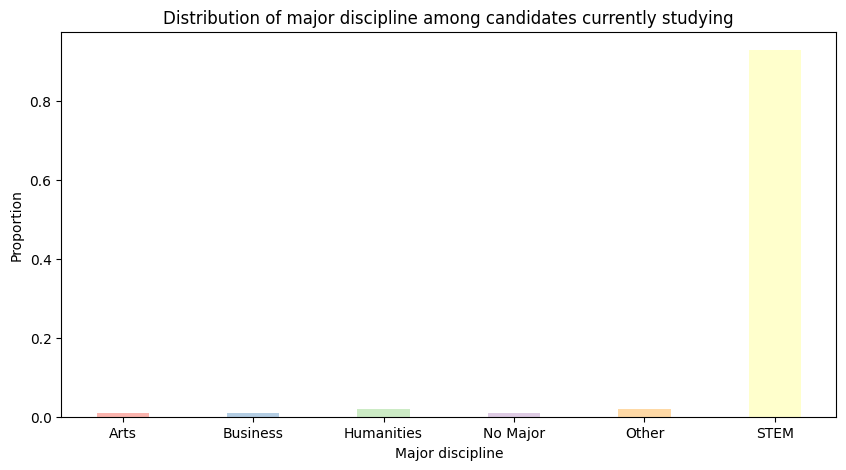

In [17]:
fig = plt.figure(figsize=(10, 5))

plt.bar(uni_major['major_discipline'], uni_major['proportion'], width=0.4, color=plt.cm.Pastel1.colors, label='Proportion')

plt.title("Distribution of major discipline among candidates currently studying")
plt.xlabel("Major discipline")
plt.ylabel("Proportion")

plt.show()

Graph 1.a.3 Previous years of professional experience among candidates 

In [18]:
uni_experience = data[['enrolled_university', 'experience']]

# Filtering out rows with 'No University' enrollment
uni_experience = uni_experience[uni_experience['enrolled_university'] != 'No University']

# Grouping by 'enrolled_university' and 'experience' and counting occurrences
uni_experience = uni_experience.groupby(['enrolled_university', 'experience']).size().reset_index(name='count')

# Calculating proportions
uni_experience['proportion'] = uni_experience.groupby('experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = uni_experience['count'].sum()

somme = uni_experience['count'].sum()

uni_experience['proportion'] = (uni_experience['count'] / somme) 
uni_experience['proportion'] = uni_experience['proportion'].round(2)
uni_experience

,enrolled_university,experience,count,proportion
0,University,0-5,2727,0.55
1,University,6-10,1452,0.29
2,University,11-15,437,0.09
3,University,16+,318,0.06


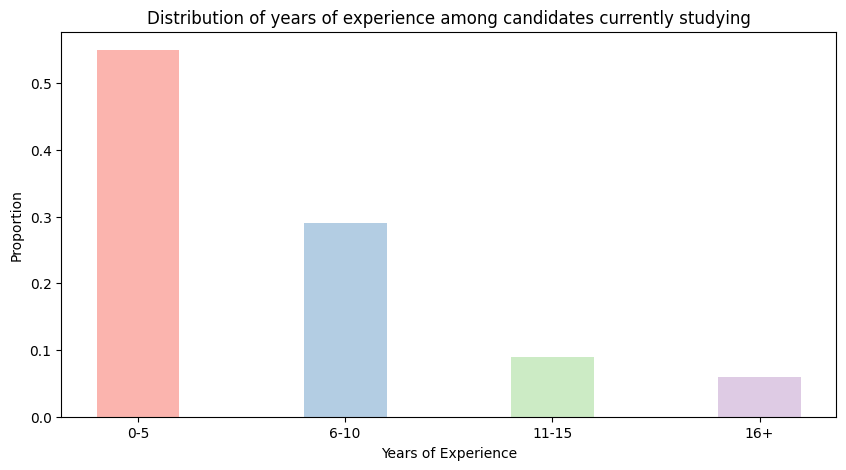

In [19]:
fig = plt.figure(figsize=(10, 5))

plt.bar(uni_experience['experience'], uni_experience['proportion'], width=0.4, color=plt.cm.Pastel1.colors, label='Proportion')

plt.title("Distribution of years of experience among candidates currently studying")
plt.xlabel("Years of Experience")
plt.ylabel("Proportion")

plt.show()

Part 1.b: Education

Graph 1.B.1 Professional relevant experience by education level

In [20]:
educ_major = data[['education_level', 'experience']]

# Grouping by 'experience' and 'education_level' and counting occurrences
educ_major = educ_major.groupby(['education_level', 'experience']).size().reset_index(name='count')

# Calculating proportions
educ_major['proportion'] = educ_major.groupby('experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = educ_major['count'].sum()

somme = educ_major['count'].sum()

educ_major['proportion'] = (educ_major['count'] / somme) 
educ_major['proportion'] = educ_major['proportion'].round(2)
educ_major

,education_level,experience,count,proportion
0,Primary School,0-5,207,0.01
1,Primary School,6-10,62,0.00
2,Primary School,11-15,19,0.00
3,Primary School,16+,19,0.00
4,High School,0-5,1163,0.06
5,High School,6-10,489,0.03
6,High School,11-15,160,0.01
7,High School,16+,201,0.01
8,Graduate,0-5,3853,0.21
9,Graduate,6-10,3161,0.17


In [21]:
educ_major = data[['education_level', 'relevent_experience']]
educ_major = educ_major.dropna()

# Grouping by 'enrolled_university' and 'relevent_experience' and counting occurrences
educ_major = educ_major.groupby(['education_level', 'relevent_experience']).size().reset_index(name='count')

# Calculating proportions
educ_major['proportion'] = educ_major.groupby('relevent_experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = educ_major['count'].sum()

somme = educ_major['count'].sum()

educ_major['proportion'] = (educ_major['count'] / somme) 
educ_major['proportion'] = educ_major['proportion'].round(2)
educ_major

,education_level,relevent_experience,count,proportion
0,Primary School,No,242,0.01
1,Primary School,Yes,66,0.00
2,High School,No,1236,0.07
3,High School,Yes,781,0.04
4,Graduate,No,2700,0.14
5,Graduate,Yes,8898,0.48
6,Masters,No,784,0.04
7,Masters,Yes,3577,0.19
8,Phd,No,155,0.01
9,Phd,Yes,259,0.01


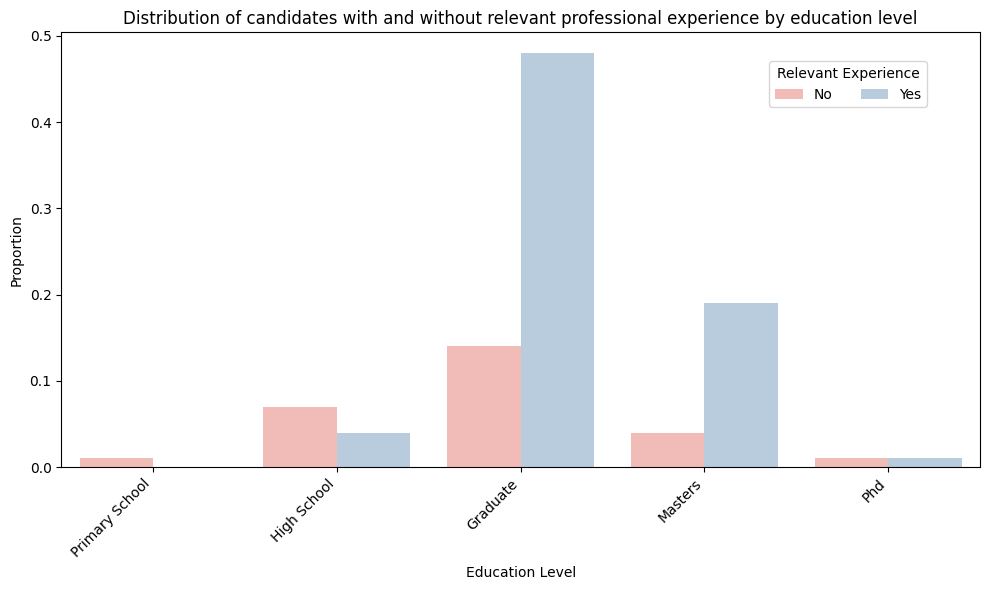

In [22]:
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.barplot(
    data=educ_major,
    x='education_level',
    y='proportion',
    hue='relevent_experience',
    palette='Pastel1',
    dodge=True
)

plt.title("Distribution of candidates with and without relevant professional experience by education level")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.legend(title="Relevant Experience", loc='upper right', bbox_to_anchor=(0.95, 0.95), ncol=2)       
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Graph 1.b.2 Previous professional experience by education degree

In [23]:
educ_experience = data[['education_level', 'experience']]

# Grouping by 'experience' and 'education_level' and counting occurrences
educ_experience = educ_experience.groupby(['education_level', 'experience']).size().reset_index(name='count')

# Calculating proportions
educ_experience['proportion'] = educ_experience.groupby('experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = educ_experience['count'].sum()

somme = educ_experience['count'].sum()

educ_experience['proportion'] = (educ_experience['count'] / somme) 
educ_experience['proportion'] = educ_experience['proportion'].round(2)
educ_experience

,education_level,experience,count,proportion
0,Primary School,0-5,207,0.01
1,Primary School,6-10,62,0.00
2,Primary School,11-15,19,0.00
3,Primary School,16+,19,0.00
4,High School,0-5,1163,0.06
5,High School,6-10,489,0.03
6,High School,11-15,160,0.01
7,High School,16+,201,0.01
8,Graduate,0-5,3853,0.21
9,Graduate,6-10,3161,0.17


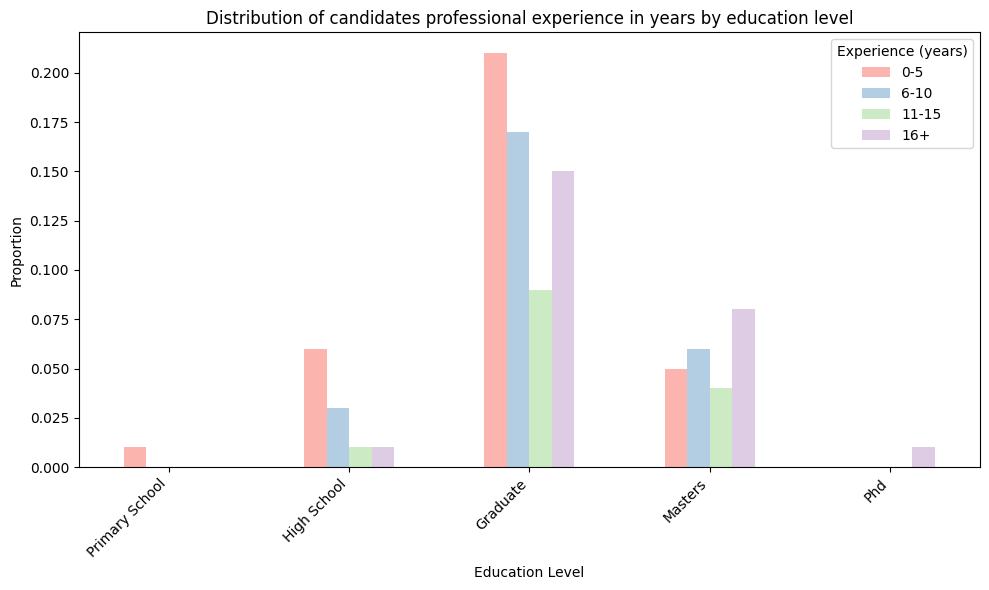

In [24]:
# Plot
pivot_data = educ_experience.pivot(index='education_level', columns='experience', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors)

plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Distribution of candidates professional experience in years by education level')
plt.legend(title="Experience (years)", loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 1.b.3 Previous job change by education level

In [25]:
educ_lastjob = data[['education_level', 'last_new_job']]

# Grouping by 'last_new_job' and 'education_level' and counting occurrences
educ_lastjob = educ_lastjob.groupby(['education_level', 'last_new_job']).size().reset_index(name='count')

# Calculating proportions
educ_lastjob['proportion'] = educ_lastjob.groupby('last_new_job')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = educ_lastjob['count'].sum()

somme = educ_lastjob['count'].sum()

educ_lastjob['proportion'] = (educ_lastjob['count'] / somme) 
educ_lastjob['proportion'] = educ_lastjob['proportion'].round(2)
educ_lastjob

,education_level,last_new_job,count,proportion
0,Primary School,never,195,0.01
1,Primary School,1,65,0.00
2,Primary School,2,23,0.00
3,Primary School,3,3,0.00
4,Primary School,4,4,0.00
5,Primary School,>4,9,0.00
6,High School,never,708,0.04
7,High School,1,745,0.04
8,High School,2,220,0.01
9,High School,3,53,0.00


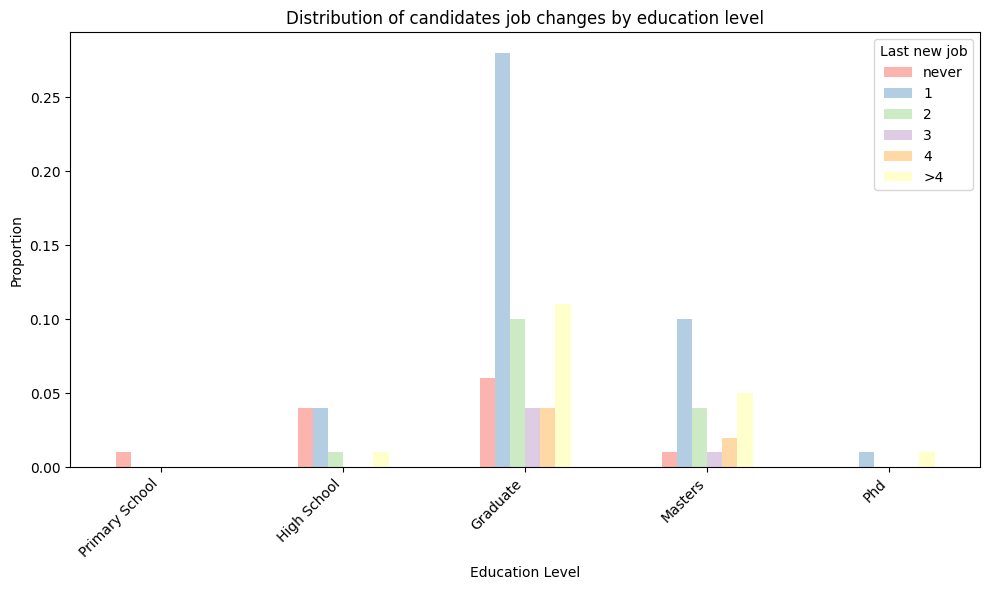

In [26]:
# Plot
pivot_data = educ_lastjob.pivot(index='education_level', columns='last_new_job', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors) #To modify the color

plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Distribution of candidates job changes by education level')
plt.legend(title="Last new job", loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 1.b.4 City development index by education level

In [27]:
educ_index = data[['education_level', 'city_development_index']]

# Grouping by 'city_development_index' and 'education_level' and counting occurrences
educ_index = educ_index.groupby(['education_level', 'city_development_index']).size().reset_index(name='count')

educ_index

,education_level,city_development_index,count
0,Primary School,0.448,0
1,Primary School,0.479,3
2,Primary School,0.487,0
3,Primary School,0.493,0
4,Primary School,0.512,0
...,...,...,...
460,Phd,0.924,11
461,Phd,0.925,6
462,Phd,0.926,46
463,Phd,0.939,25


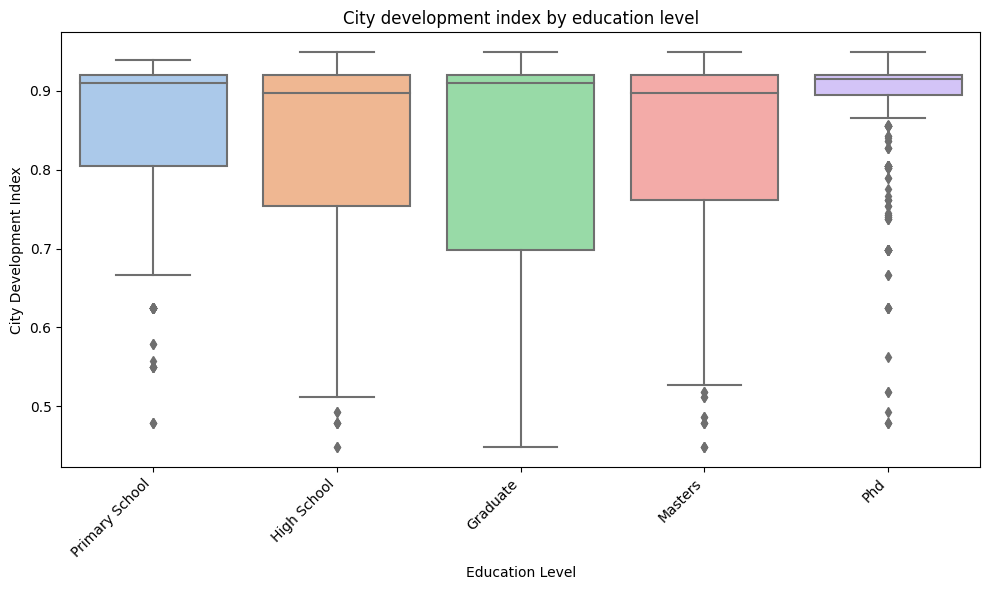

In [28]:
# Expand the dataframe based on the count column
expanded_data = np.repeat(educ_index.values, educ_index['count'], axis=0)

# Create a new DataFrame from the expanded data
expanded_df = pd.DataFrame(expanded_data, columns=educ_index.columns)

# Convert the 'city_development_index' column back to numeric
expanded_df['city_development_index'] = pd.to_numeric(expanded_df['city_development_index'])

# Plot
plt.figure(figsize=(10, 6))

# Use seaborn boxplot
sns.boxplot(data=expanded_df, x='education_level', y='city_development_index', palette='pastel')

# Customize plot
plt.title("City development index by education level")
plt.xlabel("Education Level")
plt.ylabel("City Development Index")

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Part 2.a: Experience in years

Graph 2.a.1 Experience in years by relevent experience

In [29]:
exp_relevant = data[['relevent_experience', 'experience']]

# Grouping by 'relevent_experience' and 'experience' and counting occurrences
exp_relevant = exp_relevant.groupby(['relevent_experience', 'experience']).size().reset_index(name='count')

# Calculating proportions
exp_relevant['proportion'] = exp_relevant.groupby('experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = exp_relevant['count'].sum()

somme = exp_relevant['count'].sum()

exp_relevant['proportion'] = (exp_relevant['count'] / somme) 
exp_relevant['proportion'] = exp_relevant['proportion'].round(2)
exp_relevant

,relevent_experience,experience,count,proportion
0,No,0-5,3226,0.17
1,No,6-10,1151,0.06
2,No,11-15,402,0.02
3,No,16+,566,0.03
4,Yes,0-5,3159,0.17
5,Yes,6-10,3860,0.20
6,Yes,11-15,2427,0.13
7,Yes,16+,4302,0.23


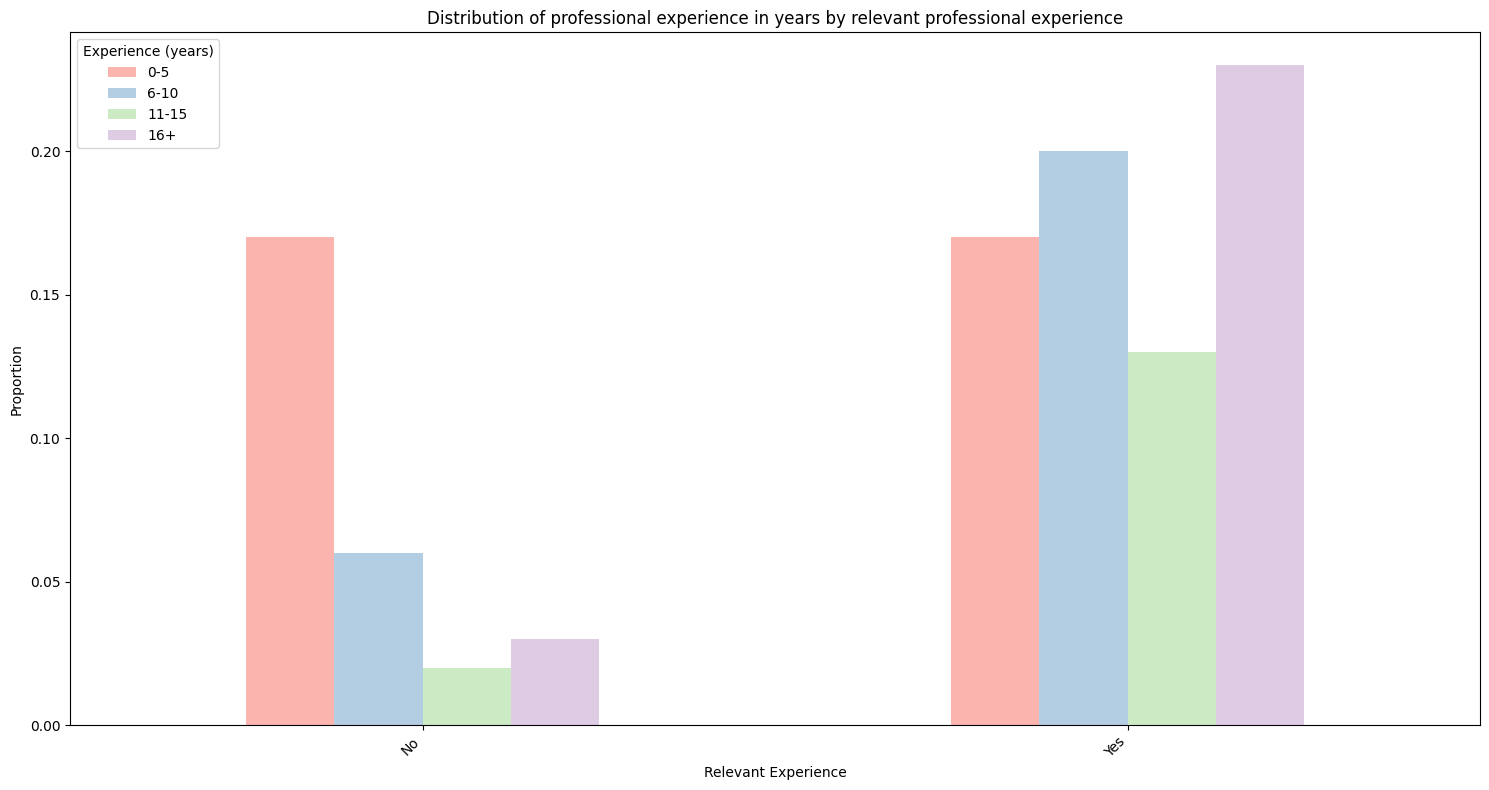

In [30]:
# Plot

pivot_data = exp_relevant.pivot(index='relevent_experience', columns='experience', values='proportion')
pivot_data.plot(kind='bar', figsize=(15,8), color=plt.cm.Pastel1.colors) #To modify the color

plt.xlabel('Relevant Experience')
plt.ylabel('Proportion')
plt.title('Distribution of professional experience in years by relevant professional experience')
plt.legend(title="Experience (years)", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

2.a.2 Job changes by years of experience

In [31]:
exp_lastjob = data[['last_new_job', 'experience']]
exp_lastjob = exp_lastjob.dropna()

# Grouping by 'last_new_job' and 'experience' and counting occurrences
exp_lastjob = exp_lastjob.groupby(['last_new_job', 'experience']).size().reset_index(name='count')

# Calculating proportions
exp_lastjob['proportion'] = exp_lastjob.groupby('experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = exp_lastjob['count'].sum()

somme = exp_lastjob['count'].sum()

exp_lastjob['proportion'] = (exp_lastjob['count'] / somme) 
exp_lastjob['proportion'] = exp_lastjob['proportion'].round(2)
exp_lastjob

,last_new_job,experience,count,proportion
0,never,0-5,1568,0.08
1,never,6-10,540,0.03
2,never,11-15,147,0.01
3,never,16+,189,0.01
4,1,0-5,3273,0.18
5,1,6-10,2337,0.13
6,1,11-15,1098,0.06
7,1,16+,1311,0.07
8,2,0-5,813,0.04
9,2,6-10,891,0.05


<function matplotlib.pyplot.show(close=None, block=None)>

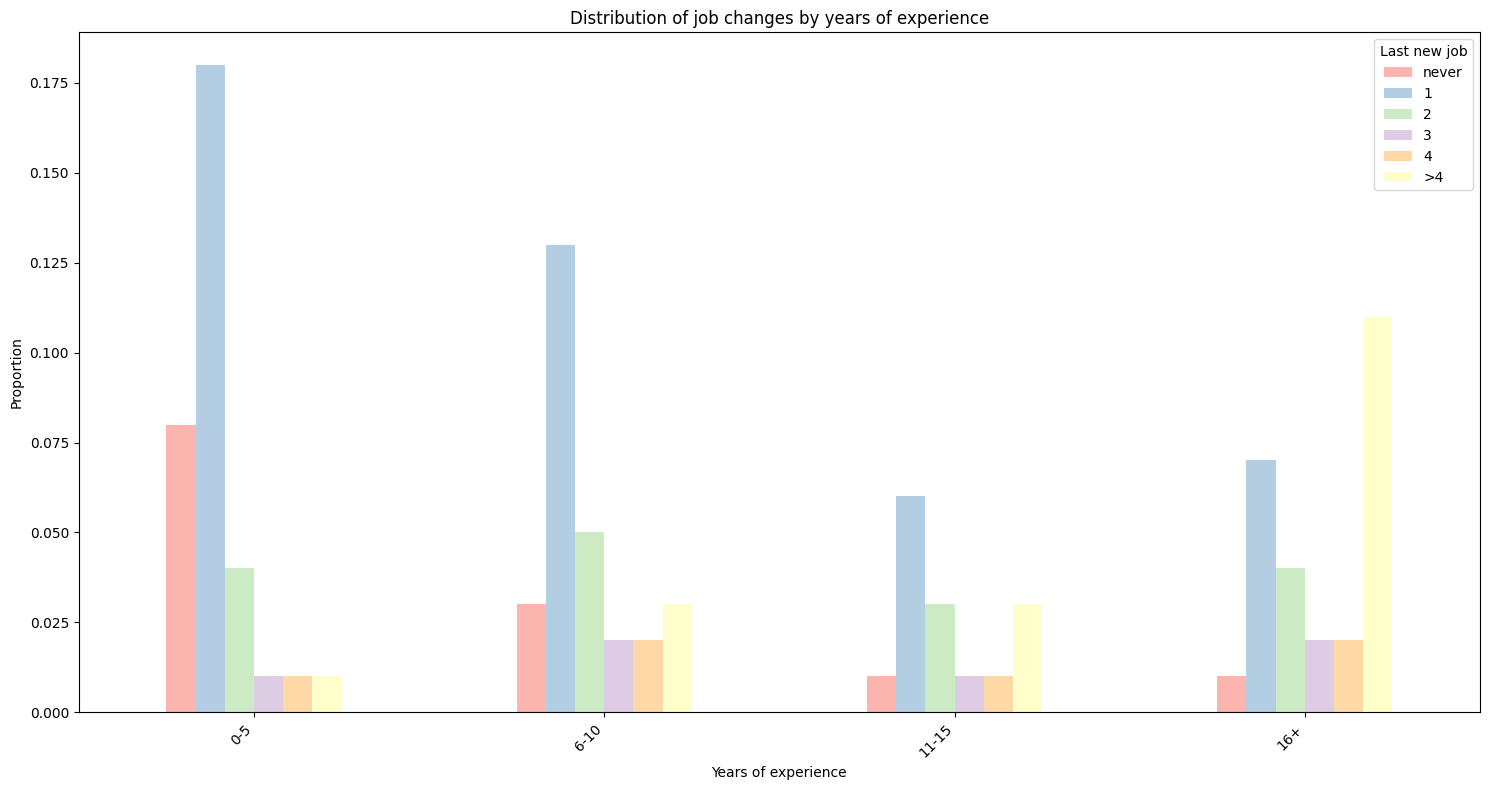

In [32]:
# Plot

pivot_data = exp_lastjob.pivot(index='experience', columns='last_new_job', values='proportion')
pivot_data.plot(kind='bar', figsize=(15,8), color=plt.cm.Pastel1.colors) #To modify the color

plt.xlabel('Years of experience')
plt.ylabel('Proportion')
plt.title('Distribution of job changes by years of experience')
plt.legend(title="Last new job", loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show

Part 2.b: Training Hours

Graph 2.b.1 Training hours by years of experience

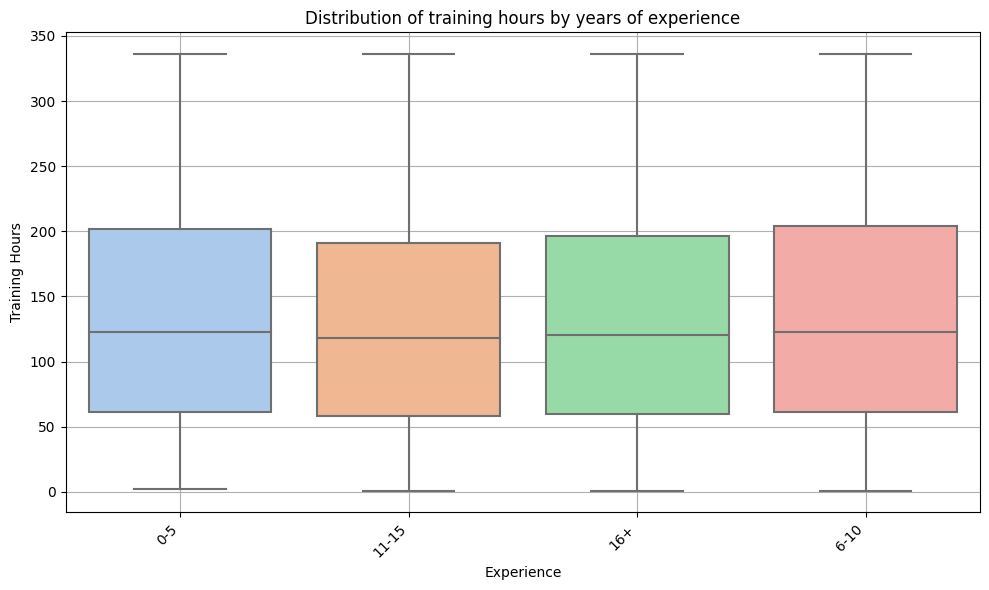

In [33]:
data_raw = pd.read_csv(r"Dataset_ADA.csv")

data_raw = data_raw.iloc[:, [13, 0, 3, 5, 6, 7, 4, 8, 7, 11, 12, 10, 9, 1, 2]]

data_raw.loc[data_raw['experience'].isin(['<1', '1', '2', '3', '4', '5']), 'experience'] = '0-5'
data_raw.loc[data_raw["experience"].isin(['6', '7', '8', '9', '10']), "experience"] = '6-10'
data_raw.loc[data_raw["experience"].isin(['11', '12', '13', '14', '15']), "experience"] = '11-15'
data_raw.loc[data_raw["experience"].isin(['16', '17', '18', '19', '20', '>20']), "experience"] = '16+'

exp_train = data_raw[['experience', 'training_hours']]
exp_train = exp_train.dropna()
exp_train = exp_train.groupby(['experience', 'training_hours']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))

# Use seaborn boxplot
sns.boxplot(data=exp_train, x='experience', y='training_hours', palette='pastel')

# Customize plot
plt.title("Distribution of training hours by years of experience")
plt.xlabel("Experience")
plt.ylabel("Training Hours")

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.grid(True)

ax = plt.gca()  # Récupérer l'axe actuel
ax.set_axisbelow(True)
plt.show()

Graph 2.b.2 Training hours by last new job

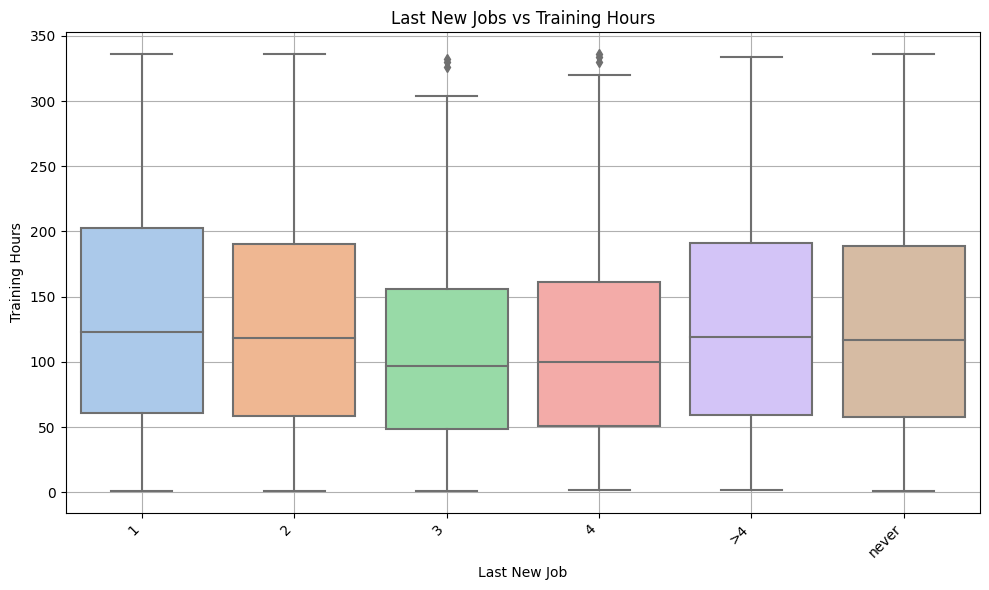

In [34]:
lastjob_training = data_raw[['last_new_job', 'training_hours']]
lastjob_training = lastjob_training.dropna()
lastjob_training = lastjob_training.groupby(['last_new_job', 'training_hours']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))

# Use seaborn boxplot
sns.boxplot(data=lastjob_training, x='last_new_job', y='training_hours', palette='pastel')

# Customize plot
plt.title("Last New Jobs vs Training Hours")
plt.xlabel("Last New Job")
plt.ylabel("Training Hours")

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)

ax = plt.gca()  
ax.set_axisbelow(True)
plt.show()

Part 3: Company

Graph 3.1 Company type by company size

In [34]:
# Order the column 'company_size'
new_order1 = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']
# Reindex the 'education_level' column with the new order
data['company_size'] = pd.Categorical(data['company_size'], categories=new_order1, ordered=True)

comp_size = data[['company_type', 'company_size']]
comp_size = comp_size.dropna()

# Grouping by 'company_type' and 'company_size' and counting occurrences
comp_size = comp_size.groupby(['company_type', 'company_size']).size().reset_index(name='count')

# Calculating proportions
comp_size['proportion'] = comp_size.groupby('company_size')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = comp_size['count'].sum()

somme = comp_size['count'].sum()

comp_size['proportion'] = (comp_size['count'] / somme) 
comp_size['proportion'] = comp_size['proportion'].round(2)
comp_size

,company_type,company_size,count,proportion
0,Early Stage Startup,<10,286,0.02
1,Early Stage Startup,10-49,176,0.01
2,Early Stage Startup,50-99,109,0.01
3,Early Stage Startup,100-499,27,0.00
4,Early Stage Startup,500-999,2,0.00
5,Early Stage Startup,1000-4999,0,0.00
6,Early Stage Startup,5000-9999,0,0.00
7,Early Stage Startup,10000+,0,0.00
8,Funded Startup,<10,144,0.01
9,Funded Startup,10-49,193,0.02


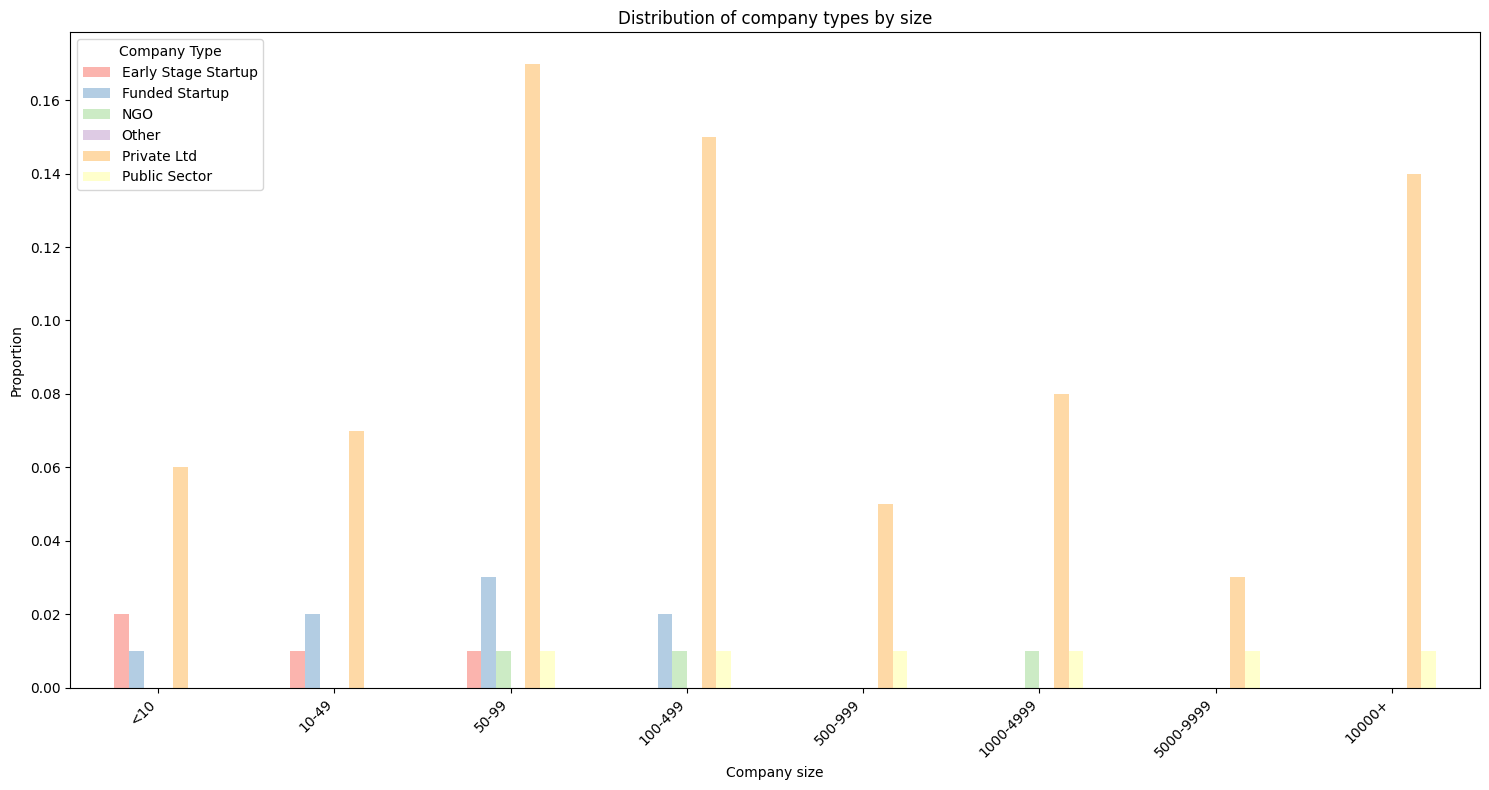

In [35]:
# Plot

pivot_data = comp_size.pivot(index='company_size', columns='company_type', values='proportion')
pivot_data.plot(kind='bar', figsize=(15,8), color=plt.cm.Pastel1.colors) 

plt.xlabel('Company size')
plt.ylabel('Proportion')
plt.title('Distribution of company types by size')
plt.legend(title="Company Type", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 3.2 University enrollment by company type

In [36]:
uni_company = data[['enrolled_university', 'company_type']]
uni_company = uni_company.dropna()

# Grouping by 'enrolled_university' and 'company_type' and counting occurrences
uni_company = uni_company.groupby(['enrolled_university', 'company_type']).size().reset_index(name='count')

# Calculating proportions
uni_company['proportion'] = uni_company.groupby('company_type')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = uni_company['count'].sum()

somme = uni_company['count'].sum()

uni_company['proportion'] = (uni_company['count'] / somme) 
uni_company['proportion'] = uni_company['proportion'].round(2)
uni_company

,enrolled_university,company_type,count,proportion
0,No University,Early Stage Startup,420,0.03
1,No University,Funded Startup,842,0.07
2,No University,NGO,363,0.03
3,No University,Other,94,0.01
4,No University,Private Ltd,7940,0.62
5,No University,Public Sector,602,0.05
6,University,Early Stage Startup,172,0.01
7,University,Funded Startup,148,0.01
8,University,NGO,148,0.01
9,University,Other,27,0.00


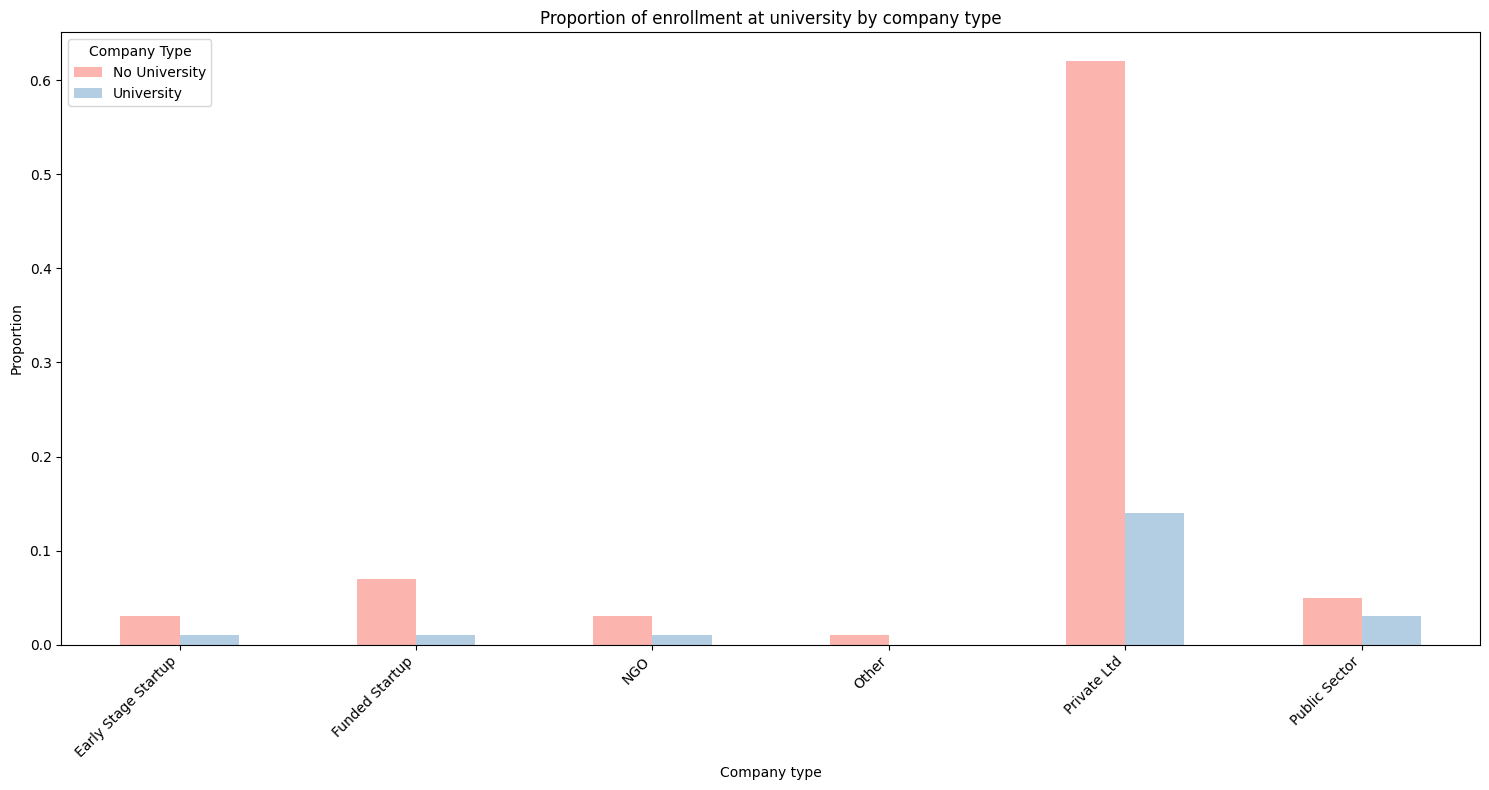

In [37]:
# Plot

pivot_data = uni_company.pivot(index='company_type', columns='enrolled_university', values='proportion')
pivot_data.plot(kind='bar', figsize=(15,8), color=plt.cm.Pastel1.colors) 

plt.xlabel('Company type')
plt.ylabel('Proportion')
plt.title('Proportion of enrollment at university by company type')
plt.legend(title="Company Type", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 3.3 Education level by company type

In [38]:
educ_company = data[['education_level', 'company_type']]
educ_company = educ_company.dropna()

# Grouping by 'company_type' and 'education_level' and counting occurrences
educ_company = educ_company.groupby(['education_level', 'company_type']).size().reset_index(name='count')

# Calculating proportions
educ_company['proportion'] = educ_company.groupby('company_type')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = educ_company['count'].sum()

somme = educ_company['count'].sum()

educ_company['proportion'] = (educ_company['count'] / somme) 
educ_company['proportion'] = educ_company['proportion'].round(2)
educ_company

,education_level,company_type,count,proportion
0,Primary School,Early Stage Startup,7,0.00
1,Primary School,Funded Startup,7,0.00
2,Primary School,NGO,2,0.00
3,Primary School,Other,1,0.00
4,Primary School,Private Ltd,68,0.01
5,Primary School,Public Sector,4,0.00
6,High School,Early Stage Startup,52,0.00
7,High School,Funded Startup,54,0.00
8,High School,NGO,29,0.00
9,High School,Other,11,0.00


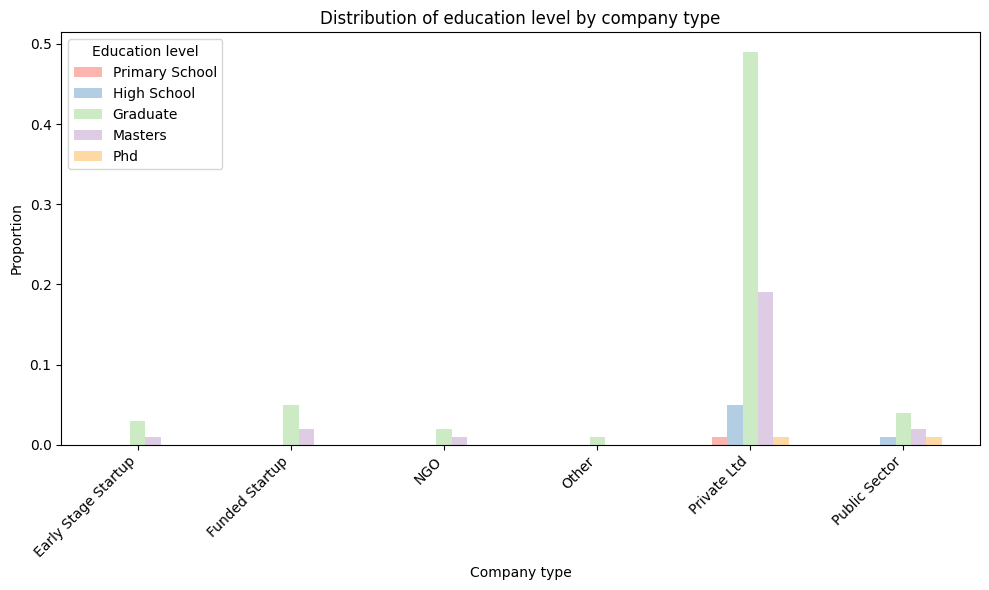

In [39]:
# Plot

pivot_data = educ_company.pivot(index='company_type', columns='education_level', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors) 

plt.xlabel('Company type')
plt.ylabel('Proportion')
plt.title('Distribution of education level by company type')
plt.legend(title="Education level", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Part 4: Target

Graph 4.1 Target by gender

In [40]:
target_gender = data[['target', 'gender']]
target_gender = target_gender.dropna()

# Grouping by 'target' and 'gender' and counting occurrences
target_gender = target_gender.groupby(['target', 'gender']).size().reset_index(name='count')

# Calculating proportions
target_gender['proportion'] = target_gender.groupby('target')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = target_gender['count'].sum()

somme = target_gender['count'].sum()

target_gender['proportion'] = (target_gender['count'] / somme) 
target_gender['proportion'] = target_gender['proportion'].round(2)
target_gender

,target,gender,count,proportion
0,0.0,Female,912,0.06
1,0.0,Male,10209,0.71
2,1.0,Female,326,0.02
3,1.0,Male,3012,0.21


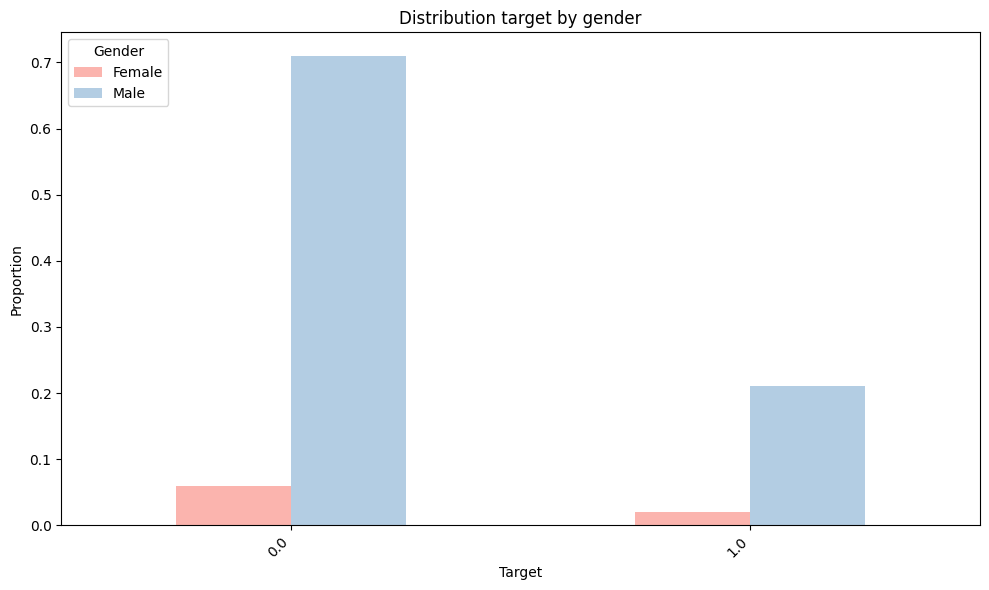

In [41]:
# Plot

pivot_data = target_gender.pivot(index='target', columns='gender', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors) 

plt.xlabel('Target')
plt.ylabel('Proportion')
plt.title('Distribution target by gender')
plt.legend(title="Gender", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 4.2 Target by training hours

In [42]:
target_training = data[['target', 'training_hours']]
target_training = target_training.dropna()

# Grouping by 'target' and 'training_hours' and counting occurrences
target_training = target_training.groupby(['target', 'training_hours']).size().reset_index(name='count')
target_training

,target,training_hours,count
0,0.0,1,7
1,0.0,2,71
2,0.0,3,87
3,0.0,4,186
4,0.0,5,81
...,...,...,...
469,1.0,328,2
470,1.0,330,1
471,1.0,332,4
472,1.0,334,2


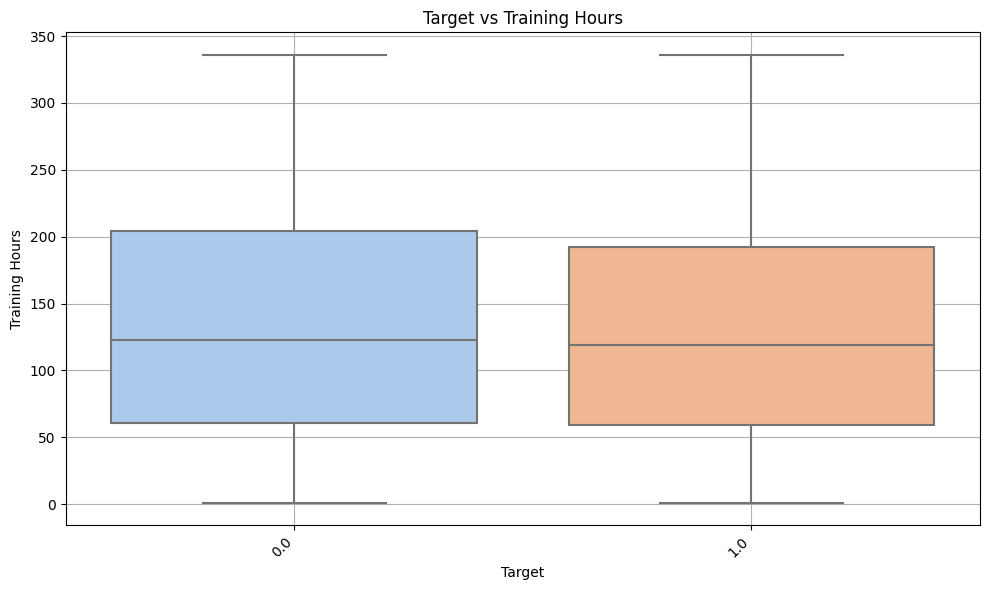

In [43]:
# Plot
plt.figure(figsize=(10, 6))

# Use seaborn boxplot
sns.boxplot(data=target_training, x='target', y='training_hours', palette='pastel')

# Customize plot
plt.title("Target vs Training Hours")
plt.xlabel("Target")
plt.ylabel("Training Hours")

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)

ax = plt.gca()  # Récupérer l'axe actuel
ax.set_axisbelow(True) # Activer la grille et la placer en arrière-plan
plt.show()

Graph 4.3 Target by relevant experience

In [44]:
target_relevant = data[['target', 'relevent_experience']]
target_relevant = target_relevant.dropna()

# Grouping by 'target' and 'relevent_experience' and counting occurrences
target_relevant = target_relevant.groupby(['target', 'relevent_experience']).size().reset_index(name='count')

# Calculating proportions
target_relevant['proportion'] = target_relevant.groupby('relevent_experience')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = target_relevant['count'].sum()

somme = target_relevant['count'].sum()

target_relevant['proportion'] = (target_relevant['count'] / somme) 
target_relevant['proportion'] = target_relevant['proportion'].round(2)
target_relevant

,target,relevent_experience,count,proportion
0,0.0,No,3550,0.19
1,0.0,Yes,10831,0.57
2,1.0,No,1816,0.09
3,1.0,Yes,2961,0.15


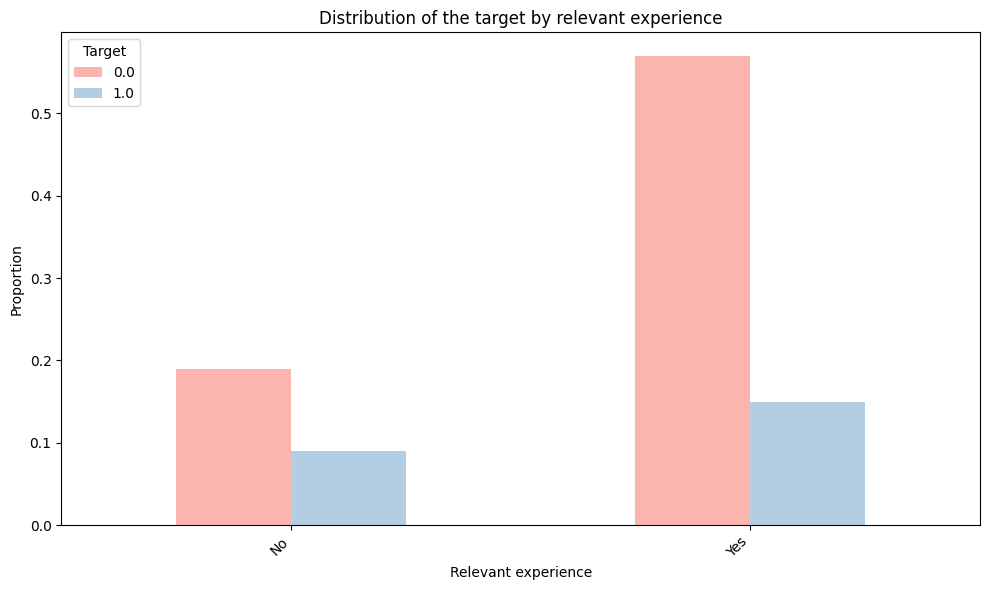

In [45]:
# Plot

pivot_data = target_relevant.pivot(index='relevent_experience', columns='target', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors) 

plt.xlabel('Relevant experience')
plt.ylabel('Proportion')
plt.title('Distribution of the target by relevant experience')
plt.legend(title="Target", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 4.4 Target by education level

In [46]:
target_educ = data[['target', 'education_level']]
target_educ = target_educ.dropna()

# Grouping by 'target' and 'education_level' and counting occurrences
target_educ = target_educ.groupby(['target', 'education_level']).size().reset_index(name='count')

# Calculating proportions
target_educ['proportion'] = target_educ.groupby('education_level')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = target_educ['count'].sum()

somme = target_educ['count'].sum()

target_educ['proportion'] = (target_educ['count'] / somme) 
target_educ['proportion'] = target_educ['proportion'].round(2)
target_educ

,target,education_level,count,proportion
0,0.0,Primary School,267,0.01
1,0.0,High School,1623,0.09
2,0.0,Graduate,8353,0.45
3,0.0,Masters,3426,0.18
4,0.0,Phd,356,0.02
5,1.0,Primary School,41,0.00
6,1.0,High School,394,0.02
7,1.0,Graduate,3245,0.17
8,1.0,Masters,935,0.05
9,1.0,Phd,58,0.00


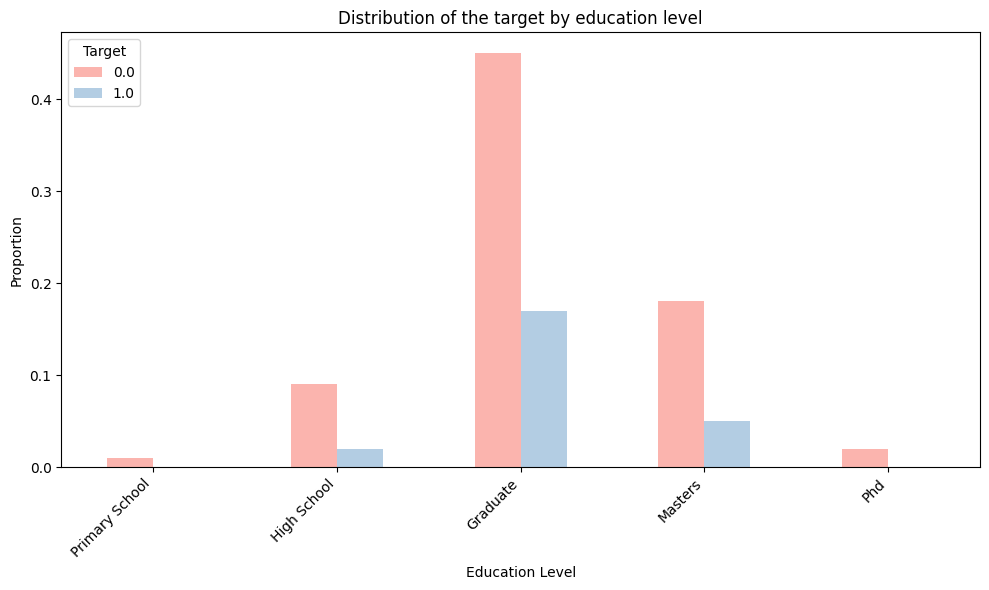

In [47]:
# Plot

pivot_data = target_educ.pivot(index='education_level', columns='target', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors) 

plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Distribution of the target by education level')
plt.legend(title="Target", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Graph 4.5 Target by company type

In [48]:
target_company = data[['target', 'company_type']]
target_company = target_company.dropna()

# Grouping by 'target' and 'company_type' and counting occurrences
target_company = target_company.groupby(['target', 'company_type']).size().reset_index(name='count')

# Calculating proportions
target_company['proportion'] = target_company.groupby('company_type')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = target_company['count'].sum()

somme = target_company['count'].sum()

target_company['proportion'] = (target_company['count'] / somme) 
target_company['proportion'] = target_company['proportion'].round(2)
target_company 

,target,company_type,count,proportion
0,0.0,Early Stage Startup,461,0.04
1,0.0,Funded Startup,861,0.07
2,0.0,NGO,424,0.03
3,0.0,Other,92,0.01
4,0.0,Private Ltd,8042,0.62
5,0.0,Public Sector,745,0.06
6,1.0,Early Stage Startup,142,0.01
7,1.0,Funded Startup,140,0.01
8,1.0,NGO,97,0.01
9,1.0,Other,29,0.00


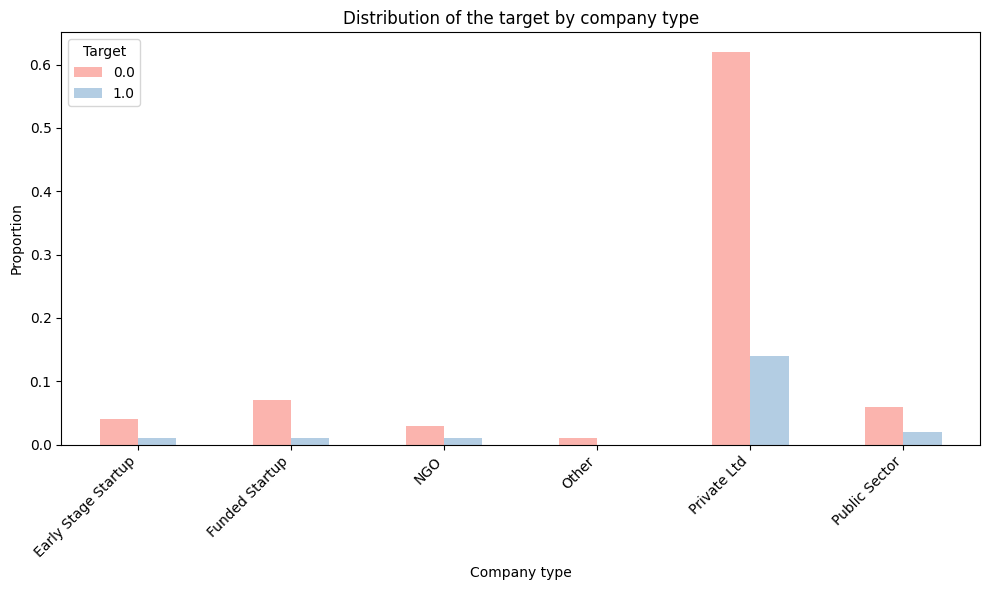

In [49]:
# Plot

pivot_data = target_company.pivot(index='company_type', columns='target', values='proportion')
pivot_data.plot(kind='bar', figsize=(10,6), color=plt.cm.Pastel1.colors)

plt.xlabel('Company type')
plt.ylabel('Proportion')
plt.title('Distribution of the target by company type')
plt.legend(title="Target", loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data = DataHR
DataHR = pd.read_csv(r'Cleaned_dataset.csv')

Missing Values Imputation

1. Missing values per features before imputation

In [16]:
NullsPerColumn = []
for col in DataHR.columns:
    NullsPerColumn.append(DataHR[col].isna().sum())

Missing_values = pd.DataFrame({"Column": DataHR.columns, "Number of NAs": NullsPerColumn})

Missing_values

,Column,Number of NAs
0,target,0
1,enrollee_id,0
2,gender,4699
3,enrolled_university,386
4,education_level,460
5,major_discipline,2813
6,relevent_experience,0
7,experience,65
8,last_new_job,423
9,training_hours,0


2. Missing values per features after imputation

Since the dataset contains a lot of observations, removing the following rows will not negatively affect our analysis.

In [17]:
DataHR_bis = DataHR.copy()

Label Encoding

In [18]:
custom_encoding = {
    'company_size': {
        '<10': 0,
        '10-49': 1,
        '50-99': 2,
        '100-499': 3,
        '500-999': 4,
        '1000-4999': 5,
        '5000-9999': 6,
        '10000+': 7
    },
    'education_level' : {
        'Primary School': 0,
        'High School': 1,
        'Graduate': 2,
        'Masters': 3,
        'Phd': 4
    },
    'experience' : {
        '0-5': 0,
        '6-10': 1,
        '11-15': 2,
        '16+': 3
    },
    'last_new_job' : {
        'never': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '>4': 5
    },
    'company_type' : {
        'Early Stage Startup': 0,
        'Funded Startup': 1,
        'Private Ltd': 2,
        'Public Sector': 3,
        'Other': 4
    },
    'gender' : {
        'Male': 0,
        'Female': 1
    },
    'enrolled_university' : {
        'No University': 0,
        'University': 1
    },
    'major_discipline' : {
        'Arts': 0,
        'Business': 1,
        'Humanities': 2,
        'STEM': 3,
        'Other': 4,
        'No Major': 5
    },
    'relevent_experience' : {
        'No': 0,
        'Yes': 1
    }
}

In [19]:
encoded_columns = ['education_level', 'experience', 'last_new_job', 'company_size', 'company_type', 'gender', 'enrolled_university', 'major_discipline', 'relevent_experience']

for column in encoded_columns:
    unique_values = DataHR_bis[column].unique()
    for value in unique_values:
        encoded_value = custom_encoding[column].get(value, np.nan)  # Get the encoded value from the dictionary
        #print(encoded_value)
        DataHR_bis.loc[DataHR_bis[column] == value, column] = encoded_value
        
#DataHR_bis.head()

In [20]:
# Set the seed for reproducibility
np.random.seed(143)

imputer = KNNImputer(n_neighbors=1)
Data = pd.DataFrame(imputer.fit_transform(DataHR_bis),columns = DataHR_bis.columns)
Data.head()

,target,enrollee_id,gender,enrolled_university,education_level,major_discipline,relevent_experience,experience,last_new_job,training_hours,company_type,company_size,city,city_development_index
0,1.0,8949.0,0.0,0.0,2.0,3.0,1.0,3.0,1.0,36.0,2.0,3.0,103.0,0.920
1,0.0,29725.0,0.0,0.0,2.0,3.0,0.0,2.0,5.0,47.0,2.0,2.0,40.0,0.776
2,0.0,11561.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,83.0,2.0,3.0,21.0,0.624
3,1.0,33241.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,52.0,2.0,0.0,115.0,0.789
4,0.0,666.0,0.0,0.0,3.0,3.0,1.0,3.0,4.0,8.0,1.0,2.0,162.0,0.767


In [21]:
NullsPerColumn = []
for col in Data.columns:
    NullsPerColumn.append(Data[col].isna().sum())

Missing_values2 = pd.DataFrame({"Column": DataHR.columns, "Number of NAs": NullsPerColumn})

Missing_values2

,Column,Number of NAs
0,target,0
1,enrollee_id,0
2,gender,0
3,enrolled_university,0
4,education_level,0
5,major_discipline,0
6,relevent_experience,0
7,experience,0
8,last_new_job,0
9,training_hours,0


In [22]:
# Saving the dataframe
Data.to_csv(r'Clean_dataset.csv', index=False)

In [23]:
# Transform 'target' into categorical variable
Data['target'] = Data['target'].astype('category')

# Remove city code and enrollee id from predictions
Data = Data.drop(columns=['enrollee_id', 'city'])

Balancing the data

In [24]:
# Set the seed for reproducibility
np.random.seed(346)

# Grouping by 'target' and counting occurrences
data_target = Data.groupby(['target']).size().reset_index(name='count')
data_target["target"] = data_target["target"].astype(object)

In [25]:
# Calculating proportions
data_target['proportion'] = data_target.groupby('target')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = data_target['count'].sum()

#Transformation en pourcentage
data_target['proportion'] = (data_target['count'] / total_count) 
data_target['proportion'] = data_target['proportion'].round(2)
data_target

,target,count,proportion
0,0.0,14381,0.75
1,1.0,4777,0.25


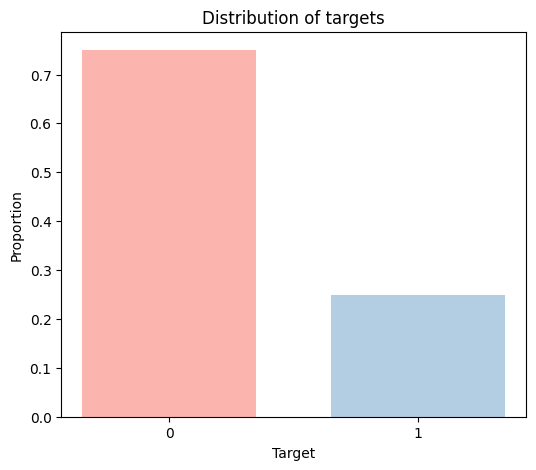

In [26]:
fig = plt.figure(figsize = (6, 5))

plt.bar([0, 1], data_target['proportion'], width=0.7, color=plt.cm.Pastel1.colors)
plt.xticks([0, 1])
plt.title("Distribution of targets")
plt.xlabel("Target")
plt.ylabel("Proportion")
plt.show()

In [27]:
# Data Resampling (Synthetic Data generation)

from imblearn.over_sampling import SMOTE

X = Data.drop(columns=['target'])
y = Data['target']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

target
0.0    14381
1.0    14381
Name: count, dtype: int64

In [28]:
data_resampled = pd.DataFrame(y_resampled)
data_resampled = data_resampled.groupby(['target']).size().reset_index(name='count')

# Calculating proportions
data_resampled['proportion'] = data_resampled.groupby('target')['count'].transform(lambda x: x / x.sum()).round(3)

total_count = data_resampled['count'].sum()

#Transformation en pourcentage
data_resampled['proportion'] = (data_resampled['count'] / total_count) 
data_resampled['proportion'] = data_resampled['proportion'].round(2)
data_resampled

,target,count,proportion
0,0.0,14381,0.5
1,1.0,14381,0.5


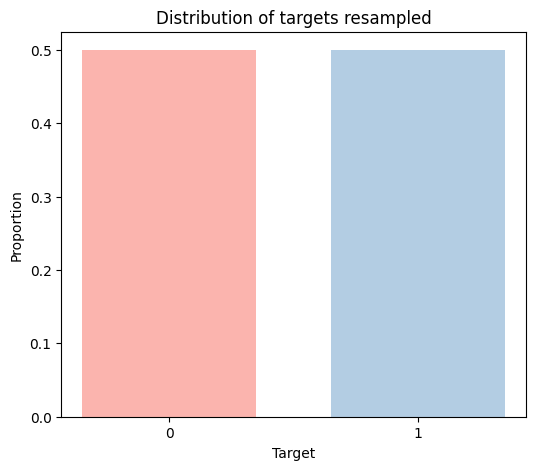

In [29]:
fig = plt.figure(figsize = (6, 5))

plt.bar([0, 1], data_resampled['proportion'], width=0.7, color=plt.cm.Pastel1.colors)
plt.xticks([0, 1])
plt.title("Distribution of targets resampled")
plt.xlabel("Target")
plt.ylabel("Proportion")
plt.show()

Data Splitting

In [30]:
# Data partitioning
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(346)

# First split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=346)

# Second split 
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=346)

In [31]:
np.random.seed(346)

#Scaling the data
scaler = MinMaxScaler()

X_train2 = scaler.fit_transform(X_train2)
X_val = scaler.fit_transform(X_val)

Supervised machine learning models

We are fitting five different models on our second training set.

1. Logistic regression
2. Naive Bayes
3. Classification tree
4. Random Forest classifier
5. Support Vector Machine (SVM)

1. Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

# Set the seed for reproducibility
np.random.seed(420)

lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train2, y_train2)

LogisticRegression()

In [33]:
# Predict
y_predicted1 = lr.predict(X_val)

In [34]:
# Testing
from sklearn.metrics import confusion_matrix, accuracy_score

# Accuracy and Confusion matrix 
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_predicted1))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted1), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.6986671817655012


,Actual 0,Actual 1
Predicted 0,1976,617
Predicted 1,943,1641


In [35]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted1)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.76


In [36]:
# Print classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_val, y_predicted1))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72      2593
         1.0       0.73      0.64      0.68      2584

    accuracy                           0.70      5177
   macro avg       0.70      0.70      0.70      5177
weighted avg       0.70      0.70      0.70      5177



2. Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Set the seed for reproducibility
np.random.seed(420)

# Train naive Bayes classifier 
nb = GaussianNB()
nb.fit(X_train2, y_train2)

# Pedict labels
y_predicted2 = nb.predict(X_val)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_predicted2))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted2), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])


Accuracy: 0.6893954027429013


,Actual 0,Actual 1
Predicted 0,1758,835
Predicted 1,773,1811


In [38]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted2)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.68


In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_predicted2))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69      2593
         1.0       0.68      0.70      0.69      2584

    accuracy                           0.69      5177
   macro avg       0.69      0.69      0.69      5177
weighted avg       0.69      0.69      0.69      5177



3. Classification tree

We use k-fold cross-validation to evaluate different values of max_depth and select the one that gives the best performance on unseen data.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Set the seed for reproducibility
np.random.seed(420)

# Define a range of max_depth values to try
max_depth_values = [3, 5, 7, 9, 1]

# Track the best accuracy and corresponding max_depth
best_accuracy = 0
best_max_depth = None

# Iterate over each max_depth value
for depth in max_depth_values:
    # Train the decision tree classifier
    clf_tree = DecisionTreeClassifier(max_depth=depth)
    clf_tree.fit(X_train2, y_train2)
    
    # Evaluate the model on the test set
    accuracy = clf_tree.score(X_val, y_val)
    
    # Update the best accuracy and max_depth if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = depth

print("Best max_depth:", best_max_depth)
print("Test accuracy with best max_depth:", best_accuracy)

Best max_depth: 9
Test accuracy with best max_depth: 0.7886807031099092


In [41]:
# Pedict labels
y_predicted3 = clf_tree.predict(X_val)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_predicted3))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted3), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])


Accuracy: 0.6959629128839095


,Actual 0,Actual 1
Predicted 0,1875,718
Predicted 1,856,1728


In [42]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted3)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.72


In [43]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_predicted3))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      2593
         1.0       0.71      0.67      0.69      2584

    accuracy                           0.70      5177
   macro avg       0.70      0.70      0.70      5177
weighted avg       0.70      0.70      0.70      5177



4. Random Forest classifier

In [44]:
# This code takes some time to run. It performs hyperparameter tuning and gives the best parameters to use to get the best accuracy.
# Output: Best: 0.801430 using {'max_depth': 7, 'max_features': 5, 'n_estimators': 200}
# You can find below this code the Random Forest Classifier model with the best parameters ready to be run.

#from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

#np.random.seed(420)

#pram_grid = {"max_depth": [4,5,6,7] ,"max_features":[3,4,5,7] , "n_estimators" : [200,100,20,40]}

#clf = RandomForestClassifier()
#rfc_grid = GridSearchCV(estimator=clf , param_grid=pram_grid , cv=10)
#rfc_grid.fit(X_train2 , y_train2)

#print ("Best: %f using %s" %(rfc_grid.best_score_, rfc_grid.best_params_))

In [45]:
# Optionally, print the full results
#df_result = pd.DataFrame(rfc_grid.cv_results_)
#df_result[['mean_test_score', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'rank_test_score']].sort_values(by='rank_test_score').head()

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Set the seed for reproducibility
np.random.seed(420)

rfc_grid = RandomForestClassifier(max_depth= 7, max_features= 5, n_estimators=200)
rfc_grid.fit(X_train2, y_train2)


RandomForestClassifier(max_depth=7, max_features=5, n_estimators=200)

In [47]:
# Pedict labels
y_predicted4 = rfc_grid.predict(X_val)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_predicted4))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted4), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8083832335329342


,Actual 0,Actual 1
Predicted 0,2142,451
Predicted 1,541,2043


In [48]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted4)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.83


In [49]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_predicted4))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81      2593
         1.0       0.82      0.79      0.80      2584

    accuracy                           0.81      5177
   macro avg       0.81      0.81      0.81      5177
weighted avg       0.81      0.81      0.81      5177



5. Support Vector Machine (SVM)

In [50]:
# This code takes some time to run. It performs hyperparameter tuning and gives the best parameters to use to get the best accuracy.
# Output: Best parameters: {'C': 1000, 'gamma': 0.1}
# You can find below this code the SVM model with the best parameters ready to be run.

#from sklearn import svm
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

#np.random.seed(420)

# Define the parameter grid
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1]}

# Define train control (cross-validation)
#svm_grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

# Fit the model
#svm_grid.fit(X_train2, y_train2)

# Print best parameters and best score
#print("Best parameters:", svm_grid.best_params_)
#print("Best score:", svm_grid.best_score_)

In [51]:
# Optionally, print the full results
#print("Full results:")
#print(pd.DataFrame(svm_grid.cv_results_))

In [52]:
from sklearn import svm
from sklearn.svm import SVC

np.random.seed(420)

svm_grid1 = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)
svm_grid1.fit(X_train2, y_train2)

SVC(C=1000, gamma=0.1, probability=True)

In [53]:
# Predict the response for test dataset
y_predicted5_1 = svm_grid1.predict(X_val)

In [54]:
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_predicted5_1))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted5_1), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.7643422831755843


,Actual 0,Actual 1
Predicted 0,2108,485
Predicted 1,735,1849


In [55]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted5_1)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.81


In [56]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_predicted5_1))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.78      2593
         1.0       0.79      0.72      0.75      2584

    accuracy                           0.76      5177
   macro avg       0.77      0.76      0.76      5177
weighted avg       0.77      0.76      0.76      5177



6. Extreme Gradient Boosting

In [57]:
# Take a bit of time to run
# Output: Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200} & Best score: 0.8404003329753191

#import xgboost as xgb

#np.random.seed(420)

# Define the parameter grid for hyperparameter tuning
#param_grid = {
#    "max_depth": [4, 5, 6, 7],
#    "learning_rate": [0.5, 0.01, 0.1, 1.0],
#    "n_estimators": [200, 100, 20, 40]
#}

# Initialize XGBoost classifier
#xgb_clf = xgb.XGBClassifier()

# Initialize GridSearchCV with XGBoost classifier and parameter grid
#xgb_classifier = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

#xgb_classifier.fit(X_train2, y_train2)

# Print best parameters and best score
#print("Best parameters:", xgb_classifier.best_params_)
#print("Best score:", xgb_classifier.best_score_)

In [58]:
import xgboost as xgb

np.random.seed(420)

xgb_classifier = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=200)
xgb_classifier.fit(X_train2, y_train2)

y_predicted6 = xgb_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_predicted6)
print("Accuracy:", accuracy)

# Compute confusion matrix and accuracy
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_predicted6), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8456635116863048


,Actual 0,Actual 1
Predicted 0,2297,296
Predicted 1,503,2081


In [59]:
#Calulate specificity
cm = confusion_matrix(y_true=y_val, y_pred=y_predicted6)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.89


In [60]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_predicted6))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2593
         1.0       0.88      0.81      0.84      2584

    accuracy                           0.85      5177
   macro avg       0.85      0.85      0.85      5177
weighted avg       0.85      0.85      0.85      5177



Model Evaluation

Now, we compare the performance of each model and their respective accuracy scores.

1. Logistic Regression

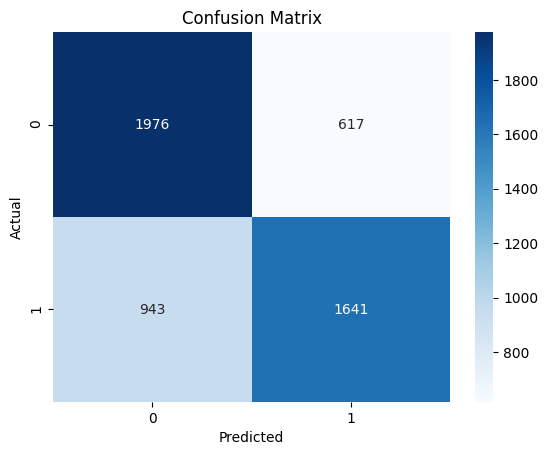

In [61]:
# Plot the confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix

#confusion_matrix = confusion_matrix(y_test, y_predicted1)
c_matrix = confusion_matrix(y_true=y_val, y_pred=y_predicted1)
c_matrix

sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Naive Bayes

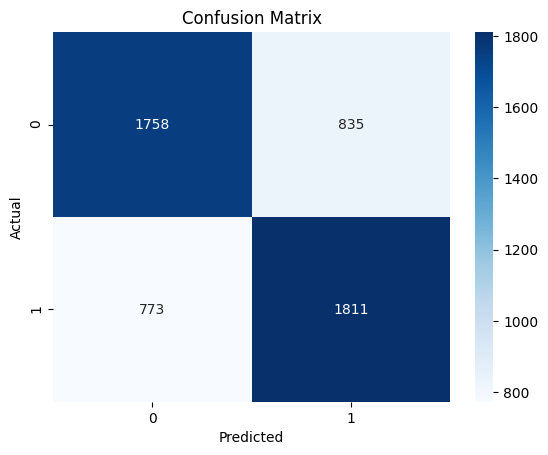

In [62]:
# Plot the confusion matrix

c_matrix2 = confusion_matrix(y_true=y_val, y_pred=y_predicted2)

# Plotting the confusion matrix
sns.heatmap(c_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3. Classification tree

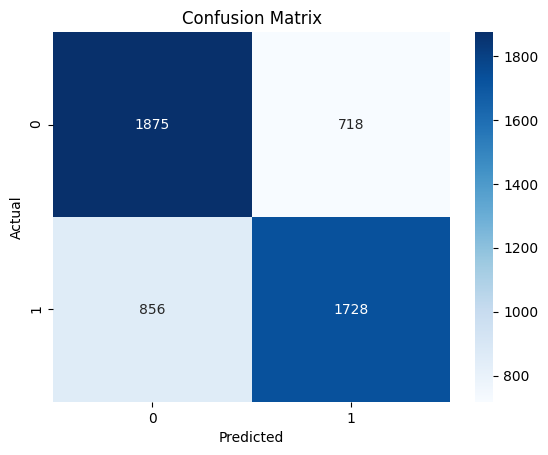

In [63]:
# Plot the confusion matrix

c_matrix3 = confusion_matrix(y_true=y_val, y_pred=y_predicted3)

# Plotting the confusion matrix
sns.heatmap(c_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4. Random Forest classifier

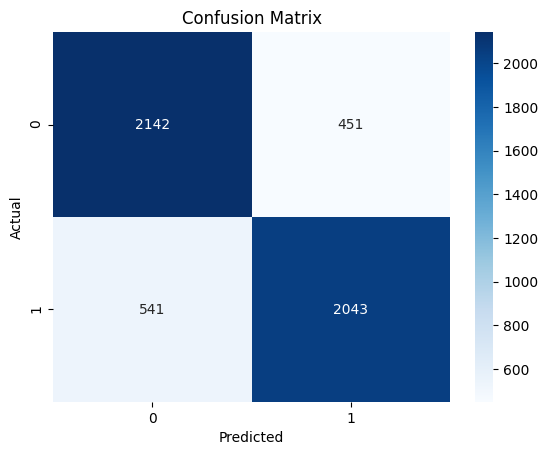

In [64]:
# Plot the confusion matrix

c_matrix4 = confusion_matrix(y_true=y_val, y_pred=y_predicted4)

# Plotting the confusion matrix
sns.heatmap(c_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5. Support Vector Machine (SVM)

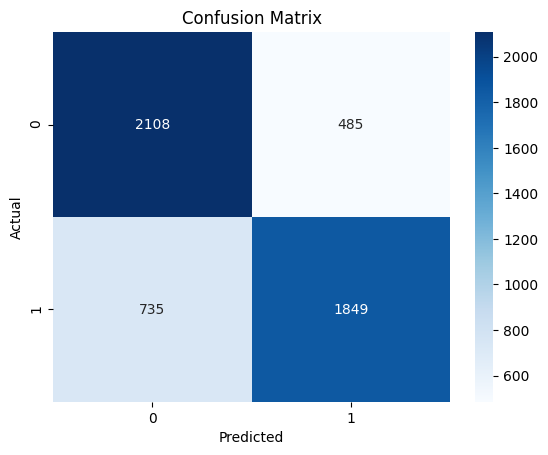

In [65]:
# Plot the confusion matrix

c_matrix5 = confusion_matrix(y_true=y_val, y_pred=y_predicted5_1)

# Plotting the confusion matrix
sns.heatmap(c_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

6. Extreme Gradient Boosting

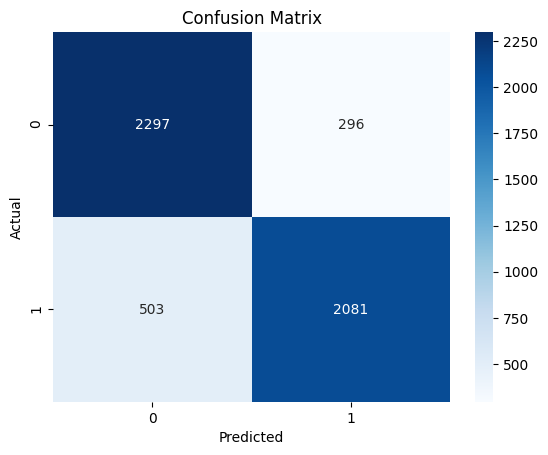

In [66]:
# Plot the confusion matrix

c_matrix6 = confusion_matrix(y_true=y_val, y_pred=y_predicted6)

# Plotting the confusion matrix
sns.heatmap(c_matrix6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

7. Comparison of models

7.1. Confusion matrices

In [67]:
#Model = ["LR", "NB", "CT", "RFC", "SVM"]
#Accuracy = [0.6890, 0.6603, 0.6657, 0.5112,0.7278]
#BalancedAccuracy = []
#Specificity = []
#Sensitivity = [0.69, 0.66, 0.67, 0.61, 0.73]


# Create dataframe to compare the five models
data = {
    'Models': ["LR", "NB", "CT", "RFC", "SVM", "XGBOOST"],
    'Accuracy': [0.699, 0.689, 0.696, 0.808, 0.764, 0.846],
    'Sensitivity': [0.70, 0.69, 0.70, 0.81, 0.76, 0.84],
    'Specificity': [0.76, 0.68, 0.72, 0.83, 0.81, 0.89]
}

# Create DataFrame
Models = pd.DataFrame(data)

# Display DataFrame
Models


,Models,Accuracy,Sensitivity,Specificity
0,LR,0.699,0.70,0.76
1,NB,0.689,0.69,0.68
2,CT,0.696,0.70,0.72
3,RFC,0.808,0.81,0.83
4,SVM,0.764,0.76,0.81
5,XGBOOST,0.846,0.84,0.89


7.2. Area under the curve (AUC)

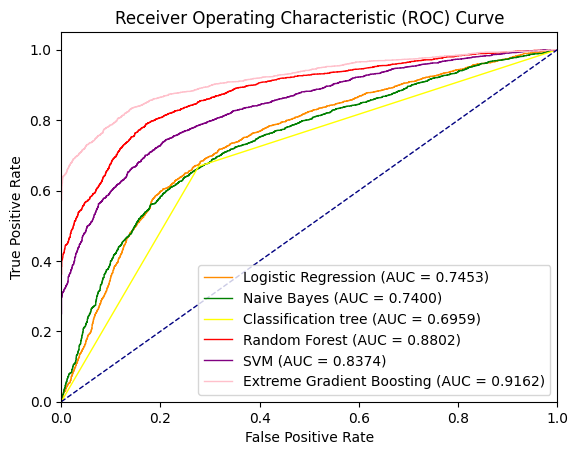

In [68]:
from sklearn.metrics import roc_curve, auc

# ROC for Logistic Regression
y_score = lr.decision_function(X_val)
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)

# ROC for Naive Bayes
# Predict probabilities
y_prob = nb.predict_proba(X_val)
# For binary classification, take the probability of the positive class
y_prob_positive = y_prob[:, 1]
# Compute ROC curve and ROC area
fpr2, tpr2, _ = roc_curve(y_val, y_prob_positive)
roc_auc2 = auc(fpr2, tpr2)

# ROC for Classification tree
y_prob = clf_tree.predict_proba(X_val)
y_prob_positive3 = y_prob[:, 1]
fpr3, tpr3, _ = roc_curve(y_val, y_prob_positive3)
roc_auc3 = auc(fpr3, tpr3)

# ROC for Random Forest classifier
y_prob = rfc_grid.predict_proba(X_val)
y_prob_positive4 = y_prob[:, 1]
fpr4, tpr4, _ = roc_curve(y_val, y_prob_positive4)
roc_auc4 = auc(fpr4, tpr4)

# ROC for Support Vector Machine (SVM)
y_score5 = svm_grid1.decision_function(X_val)
fpr5, tpr5, _ = roc_curve(y_val, y_score5)
roc_auc5 = auc(fpr5, tpr5)

# ROC for Extreme Gradient Boosting
y_prob = xgb_classifier.predict_proba(X_val)
y_prob_positive6 = y_prob[:, 1]
fpr6, tpr6, _ = roc_curve(y_val, y_prob_positive6)
roc_auc6 = auc(fpr6, tpr6)

# Plot ROC curve
plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression (AUC = %0.4f)' % roc_auc)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, label='Naive Bayes (AUC = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='yellow',
         lw=lw, label='Classification tree (AUC = %0.4f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='red',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='purple',
         lw=lw, label='SVM (AUC = %0.4f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='pink',
         lw=lw, label='Extreme Gradient Boosting (AUC = %0.4f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.grid(True)

#ax = plt.gca()  # Récupérer l'axe actuel
#ax.set_axisbelow(True) # Activer la grille et la placer en arrière-plan
plt.show()

Overfitting - Testing

We are now down to picking between two of the best performing models - Random Forest Classifier ans XGBOOST. We have seen how these models have performed on the validation set. However, to check for over-fitting, we can compute these models on the test set to see if the confusion matrix values are very dissimilar for the two cases.

In [69]:
np.random.seed(346)

#Scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
# Set the seed for reproducibility
np.random.seed(346)

# Random Forest Classifier
# Train the model
rand_f = RandomForestClassifier(max_depth= 7, max_features= 5, n_estimators=200)
rand_f.fit(X_train, y_train)

# Pedict labels
y_pred1 = rand_f.predict(X_test)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred1))
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred1), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.7893639207507821


,Actual 0,Actual 1
Predicted 0,1095,310
Predicted 1,296,1176


In [71]:
#Calulate specificity
cm = confusion_matrix(y_true=y_test, y_pred=y_pred1)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.78


In [72]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      1405
         1.0       0.79      0.80      0.80      1472

    accuracy                           0.79      2877
   macro avg       0.79      0.79      0.79      2877
weighted avg       0.79      0.79      0.79      2877



In [73]:
# XGBOOST
np.random.seed(346)

xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

# Pedict labels
y_pred5 = xgboost.predict(X_test)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred5))
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred5), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.7222801529370872


,Actual 0,Actual 1
Predicted 0,741,664
Predicted 1,135,1337


In [74]:
#Calulate specificity
cm = confusion_matrix(y_true=y_test, y_pred=y_pred5)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Specificity: {specificity:.2f}')

Specificity: 0.53


In [75]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred5))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.53      0.65      1405
         1.0       0.67      0.91      0.77      1472

    accuracy                           0.72      2877
   macro avg       0.76      0.72      0.71      2877
weighted avg       0.75      0.72      0.71      2877



The upcoming table indicates the accuracy, balanced accuracy for the two models. We notice that they are not very different for the validation and test set for the Random Forest Classifier. In fact, its variation is smaller than 2%. Thus, we can be confident that there is no over-fitting in this model. However, regarding the XGBOOST we can notice an important decraese overall. Therefore, the model might be over-fitting.

In [76]:
# Create dataframe to compare the test set and validation set of the two models.
data1 = {
    'Models': ["RFC", "RFC", "XGBOOST", "XGBOOST"],
    'Set': ["Val", "Test", "Val", "Test"],
    'Accuracy': [0.808, 0.789, 0.843, 0.722],
    'Sensitivity': [0.81, 0.79, 0.84, 0.72],
    'Specificity': [0.83, 0.78, 0.89, 0.53]
}

# Create DataFrame
Models1 = pd.DataFrame(data1)

# Display DataFrame
Models1

,Models,Set,Accuracy,Sensitivity,Specificity
0,RFC,Val,0.808,0.81,0.83
1,RFC,Test,0.789,0.79,0.78
2,XGBOOST,Val,0.843,0.84,0.89
3,XGBOOST,Test,0.722,0.72,0.53


Repeated Splits

In order to deepen the analysis of over-fitting, we perform a cross validation. This will establish the robustness of the models and give more realistic model parameters. To do so, we proceed to do a K-fold cross validation with K = 10 on the original data set. 

In [77]:
# This code takes some time to run. It performs hyperparameter tuning and gives the best parameters to use to get the best accuracy.
# Output: Best: 0.782440 using {'max_depth': 4, 'max_features': 5, 'n_estimators': 40}
# You can find below this code the SVM model with the best parameters ready to be run.

#from sklearn.model_selection import KFold, cross_val_score
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#import numpy as np

# Set random seed for reproducibility
#np.random.seed(346)

# Define the inner and outer cross-validation strategies
#inner_cv = KFold(n_splits=10, shuffle=True, random_state=346)

# Define the parameter grid for hyperparameter tuning
#param_grid = {
#    "max_depth": [4, 5, 6, 7],
#    "max_features": [3, 4, 5, 7],
#    "n_estimators": [200, 100, 20, 40]
#}

# Define the base model
#rf = RandomForestClassifier(random_state=346)

# Define the GridSearchCV for hyperparameter tuning with inner cross-validation
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

# Perform the hyperparameter tuning
#grid_search.fit(X, y)

# Print the best score and best parameters
#print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))


In [78]:
from sklearn.model_selection import KFold, cross_val_score

# Set random seed for reproducibility
np.random.seed(346)

# Perform nested cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=346)
rf_clf = RandomForestClassifier(max_depth=4 , max_features=5 , n_estimators=40)
nested_cv_scores = cross_val_score(rf_clf, X, y, cv=outer_cv, scoring='accuracy')

# Print the cross-validation scores and the mean score
print("Random Forest Cross-validation scores: ", nested_cv_scores)
print("Random Forest Mean cross-validation score: ", nested_cv_scores.mean())

Random Forest Cross-validation scores:  [0.77296451 0.78810021 0.78653445 0.77870564 0.78914405 0.78496868
 0.78183716 0.78862213 0.77127937 0.77023499]
Random Forest Mean cross-validation score:  0.7812391187035654


In [79]:
# Output: Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20} and Best Score: 0.7806660143793913

# XGBOOST
#import xgboost as xgb
#from sklearn.model_selection import GridSearchCV

# Set random seed for reproducibility
#np.random.seed(346)

# Define the parameter grid for hyperparameter tuning
#param_grid = {
#    "max_depth": [4, 5, 6, 7],
#    "learning_rate": [0.5, 0.01, 0.1, 1.0],
#    "n_estimators": [200, 100, 20, 40]
#}

# Initialize XGBoost classifier
#xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV with XGBoost classifier and parameter grid
#grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform Grid Search
#grid_search.fit(X, y)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

In [80]:
# Set random seed for reproducibility
np.random.seed(346)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=346)

xgb_classifier = xgb.XGBClassifier(max_depth=4 , learning_rate=0.1 ,n_estimators=20)

# Perform cross-validation
cv_results = cross_val_score(xgb_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print("XGBOOST Cross-validation scores: ", cv_results)
print("XGBOOST Mean cross-validation score: ", cv_results.mean())

XGBOOST Cross-validation scores:  [0.76931106 0.79018789 0.78549061 0.77922756 0.79018789 0.78601253
 0.7802714  0.78601253 0.77023499 0.76814621]
XGBOOST Mean cross-validation score:  0.7805082662422256


The Random Forest classifier provides more interpretable results. As a matter of fact, evaluating feature importance score is generally more straightforward in Random Forests because the trees are not interdependent, making it easier to see the contribution of each feature without considering complex sequential corrections.  Thus, our final decision is to go with the Random Forest classifier as our best model.

Multicollinearity

The Variance Inflation Factor (VIF) measures how much the variance of an estimated regression coefficient increases due to collinearity. In general:
VIF < 5: Low multicollinearity;
5 ≤ VIF < 10: Moderate multicollinearity;
VIF ≥ 10: High multicollinearity

In [81]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# df is the clean DataFrame 
df = pd.read_csv(r"Clean_dataset.csv")
df = df.drop(columns=['enrollee_id', 'city'], axis=1)

# Add a constant column for the intercept term in the OLS regression model
df['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Exclude the VIF for the intercept term if added
vif_data = vif_data[vif_data['feature'] != 'Intercept']

print(vif_data)


                   feature       VIF
0                   target  1.154494
1                   gender  1.010839
2      enrolled_university  1.232160
3          education_level  1.118115
4         major_discipline  1.011679
5      relevent_experience  1.270700
6               experience  1.561122
7             last_new_job  1.297615
8           training_hours  1.000958
9             company_type  1.092694
10            company_size  1.088989
11  city_development_index  1.260668


Variable Impotance

The following code measures how much the performance metric (F1 score in this case) decreases when the values of each feature are randomly shuffled.

Features with higher importance scores have a larger impact on the model’s predictions.

In [82]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
p_imp = permutation_importance(estimator=rfc_grid, X=X_val, y=y_val, scoring='f1', n_repeats=5, random_state=42)

# Print feature importance
for i, imp in enumerate(p_imp.importances_mean):
    print(f"Feature {X.columns[i]} importance: {imp}")

# Create DataFrame for feature importance
feature_imp = pd.DataFrame({'feature': X.columns, 'importance': p_imp.importances_mean})
feature_imp.sort_values(by='importance', ascending=False, inplace=True)

Feature gender importance: 0.0005521888638047034
Feature enrolled_university importance: 0.03931618097904179
Feature education_level importance: 0.044206594108329125
Feature major_discipline importance: 4.7073415211218436e-05
Feature relevent_experience importance: 0.052241752584497946
Feature experience importance: 0.027762604391450618
Feature last_new_job importance: 0.00185952009560173
Feature training_hours importance: 0.0011168867553294603
Feature company_type importance: 0.0012427870216556558
Feature company_size importance: 0.0007701770537968278
Feature city_development_index importance: 0.13118897227333215


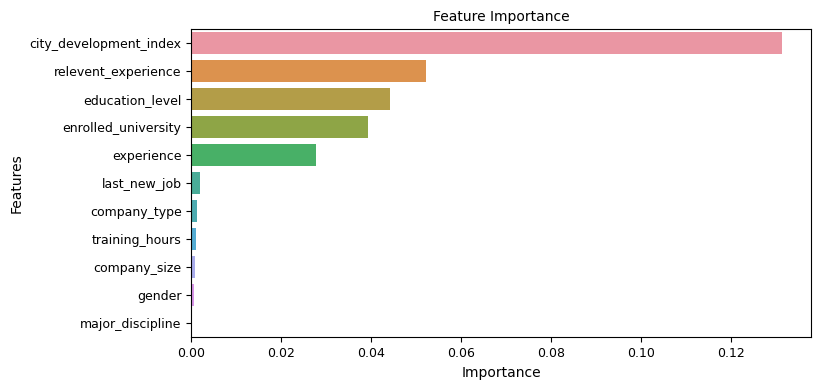

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_imp, order=feature_imp.sort_values('importance', ascending=False).feature)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.title('Feature Importance', fontsize=10)
plt.show()

Accuracy test when removing less important features.

The below code show that removing the columns from the training set does not improve the accuracy of the model. 
We choose to try removing the features that are the most correlated with other features (See the Correlation Matrix of Independent Features above) and that are less important based on the above Feature Importance barplot. 

In [92]:
X_train2_df = pd.DataFrame(X_train2, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index'])

In [93]:
# Try increasing the accuracy by removing features
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_1 = X_train2_df.drop(['last_new_job'], axis=1)
X_val_1 = X_val_df.drop(['last_new_job'], axis=1)

In [94]:
np.random.seed(420)

rfc_grid.fit(X_train2_1, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8035541819586633


,Actual 0,Actual 1
Predicted 0,2114,479
Predicted 1,538,2046


In [95]:
# Remove 'company_type' from the training set
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_2 = X_train2_df.drop(['company_type'], axis=1)
X_val_1 = X_val_df.drop(['company_type'], axis=1)

In [96]:
np.random.seed(420)

rfc_grid.fit(X_train2_2, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8058721267143133


,Actual 0,Actual 1
Predicted 0,2127,466
Predicted 1,539,2045


In [98]:
# Remove 'major_discipline' from the training set
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_3 = X_train2_df.drop(columns=['major_discipline'], axis=1)
X_val_1 = X_val_df.drop(columns=['major_discipline'], axis=1)

In [99]:
np.random.seed(420)

rfc_grid.fit(X_train2_3, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.80509947846243


,Actual 0,Actual 1
Predicted 0,2128,465
Predicted 1,544,2040


In [100]:
# Remove 'company_size' from the training set
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_3 = X_train2_df.drop(columns=['company_size'], axis=1)
X_val_1 = X_val_df.drop(columns=['company_size'], axis=1)

In [101]:
np.random.seed(420)

rfc_grid.fit(X_train2_3, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8052926405254008


,Actual 0,Actual 1
Predicted 0,2130,463
Predicted 1,545,2039


In [102]:
# Remove 'gender' from the training set
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_3 = X_train2_df.drop(columns=['gender'], axis=1)
X_val_1 = X_val_df.drop(columns=['gender'], axis=1)

In [103]:
np.random.seed(420)

rfc_grid.fit(X_train2_3, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8076105852810508


,Actual 0,Actual 1
Predicted 0,2141,452
Predicted 1,544,2040


In [110]:
# Remove 'gender', 'company_size', 'major_discipline' and 'last_new_job' from the training set
X_val_df = pd.DataFrame(X_val, columns=['gender', 'enrolled_university', 'education_level', 'major_discipline',
                                              'relevent_experience', 'experience', 'last_new_job', 'training_hours',
                                              'company_type', 'company_size', 'city_development_index']) 

X_train2_3 = X_train2_df.drop(columns=['gender', 'company_size', 'major_discipline', 'last_new_job', 'company_type'], axis=1)
X_val_1 = X_val_df.drop(columns=['gender', 'company_size', 'major_discipline', 'last_new_job', 'company_type'], axis=1)

In [111]:
np.random.seed(420)

rfc_grid.fit(X_train2_3, y_train2)

# Pedict labels
y_pred5_ = rfc_grid.predict(X_val_1)

# Compute confusion matrix and accuracy
print('Accuracy:', accuracy_score(y_true=y_val, y_pred=y_pred5_))
pd.DataFrame(confusion_matrix(y_true=y_val, y_pred=y_pred5_), columns=['Actual 0', 'Actual 1'], index=['Predicted 0', 'Predicted 1'])

Accuracy: 0.8047131543364883


,Actual 0,Actual 1
Predicted 0,2141,452
Predicted 1,559,2025
